In [3]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
file_path = "/Users/adelh/Downloads/analyst-task/data-zaplnenost-kontejneru/measurements-march.csv"
data=pd.read_csv(file_path)

In [5]:
file_path = '/Users/adelh/Downloads/analyst-task/data-zaplnenost-kontejneru/containers.geojson'
gdf = gpd.read_file(file_path)

In [6]:
data = pd.merge(data, gdf[['code','trash_type','installed_at','address']], on='code', how='left')

In [7]:
data = data.loc[lambda x: x["trash_type"].isin(['glass_white', 'glass_colored'])]

In [11]:
## Detection and reg_fce
TURN_PARAMETER = 2
EPS= 0.01

def trend_label(a):
    if -0.05 <= a <= 0.05:
        return 'Non-decreasing/Non-increasing'
    elif a > 0.05:
        return 'Increasing'
    elif a < -0.05:
        return 'Decreasing'
    else:
        return 'Unknown'


def viz_data(cont_id, data):
    subset = data[data['container_id']==cont_id].sort_values(by = 'measured_at').drop_duplicates(subset=['percent_calculated', 'measured_at'])
    subset = subset.reset_index(drop = True)
    print('Raw measurements plt')
    plt.plot(subset['percent_calculated'])
    plt.show()
    plt.close()

    measurements_list = subset['percent_calculated'].tolist()
    potential_turnoff_indices = []
    for i in range(len(measurements_list)-TURN_PARAMETER):
        if i == 0:
            continue
        NEXT_VAL= measurements_list[i+1]+EPS
        NEXT_NEXT_VAL= measurements_list[i+2]+EPS

        if (measurements_list[i]/NEXT_VAL)>TURN_PARAMETER and (measurements_list[i]/NEXT_NEXT_VAL)>TURN_PARAMETER:
            potential_turnoff_indices.append(i+1) # twice in a row there was less then half of the previous measurement

    print('Potential turnoff times')
    print(potential_turnoff_indices)


    array_of_monotonical_arrays = []
    if len(potential_turnoff_indices)==0:
        array_of_monotonical_arrays.append(measurements_list)

    else:
        array_of_monotonical_arrays.append(measurements_list[:potential_turnoff_indices[0]])

        for i in range(len(potential_turnoff_indices)):
            if i == (len(potential_turnoff_indices)-1):
                arr = measurements_list[potential_turnoff_indices[-1]:]
            else:
                arr = measurements_list[potential_turnoff_indices[i]:potential_turnoff_indices[i+1]]

            array_of_monotonical_arrays.append(arr)


    for arr in array_of_monotonical_arrays:
        try:
            print(arr)
            a, b = np.polyfit([i for i in range(len(arr))], arr, 1)
            trend = trend_label(a)
            print(a)
            print(b)
            print(trend)
            print('xxxxx')
        except:
            pass

Raw measurements plt


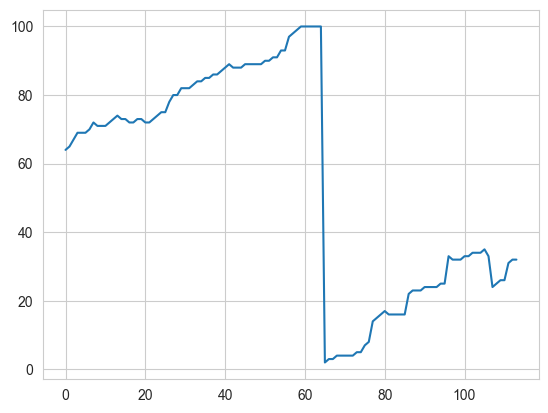

Potential turnoff times
[65]
[64, 65, 67, 69, 69, 69, 70, 72, 71, 71, 71, 72, 73, 74, 73, 73, 72, 72, 73, 73, 72, 72, 73, 74, 75, 75, 78, 80, 80, 82, 82, 82, 83, 84, 84, 85, 85, 86, 86, 87, 88, 89, 88, 88, 88, 89, 89, 89, 89, 89, 90, 90, 91, 91, 93, 93, 97, 98, 99, 100, 100, 100, 100, 100, 100]
0.54208916083916
64.89930069930074
Increasing
xxxxx
[2, 3, 3, 4, 4, 4, 4, 4, 5, 5, 7, 8, 14, 15, 16, 17, 16, 16, 16, 16, 16, 22, 23, 23, 23, 24, 24, 24, 24, 25, 25, 33, 32, 32, 32, 33, 33, 34, 34, 34, 35, 33, 24, 25, 26, 26, 31, 32, 32]
0.703673469387755
3.3771428571428577
Increasing
xxxxx


In [12]:
viz_data(29791,data)

Raw measurements plt


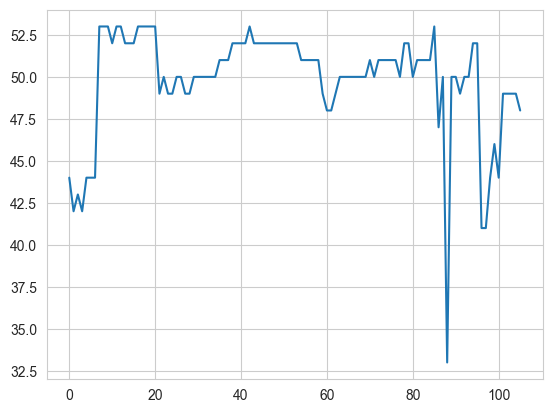

Potential turnoff times
[]
[44, 42, 43, 42, 44, 44, 44, 53, 53, 53, 52, 53, 53, 52, 52, 52, 53, 53, 53, 53, 53, 49, 50, 49, 49, 50, 50, 49, 49, 50, 50, 50, 50, 50, 50, 51, 51, 51, 52, 52, 52, 52, 53, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 51, 51, 51, 51, 51, 49, 48, 48, 49, 50, 50, 50, 50, 50, 50, 50, 51, 50, 51, 51, 51, 51, 51, 50, 52, 52, 50, 51, 51, 51, 51, 53, 47, 50, 33, 50, 50, 49, 50, 50, 52, 52, 41, 41, 44, 46, 44, 49, 49, 49, 49, 48]
-0.01302365418041717
50.50449656145304
Non-decreasing/Non-increasing
xxxxx
Raw measurements plt


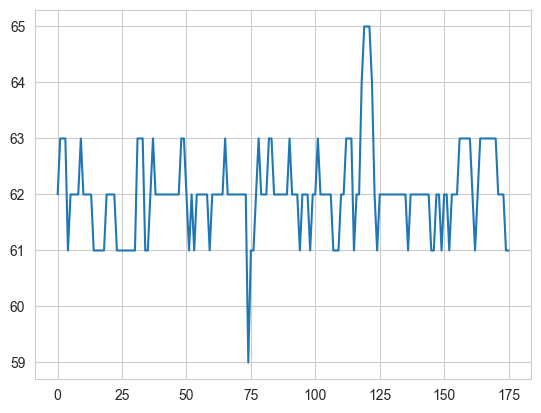

Potential turnoff times
[]
[62, 63, 63, 63, 61, 62, 62, 62, 62, 63, 62, 62, 62, 62, 61, 61, 61, 61, 61, 62, 62, 62, 62, 61, 61, 61, 61, 61, 61, 61, 61, 63, 63, 63, 61, 61, 62, 63, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 63, 63, 62, 61, 62, 61, 62, 62, 62, 62, 62, 61, 62, 62, 62, 62, 62, 63, 62, 62, 62, 62, 62, 62, 62, 62, 59, 61, 61, 62, 63, 62, 62, 62, 63, 63, 62, 62, 62, 62, 62, 62, 63, 62, 62, 62, 61, 62, 62, 62, 61, 62, 62, 63, 62, 62, 62, 62, 62, 61, 61, 61, 62, 62, 63, 63, 63, 61, 62, 62, 64, 65, 65, 65, 64, 62, 61, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 61, 62, 62, 62, 62, 62, 62, 62, 62, 61, 61, 62, 62, 61, 62, 62, 61, 62, 62, 62, 63, 63, 63, 63, 63, 62, 61, 62, 63, 63, 63, 63, 63, 63, 63, 62, 62, 62, 61, 61]
0.0027944089808495023
61.78389830508477
Non-decreasing/Non-increasing
xxxxx
Raw measurements plt


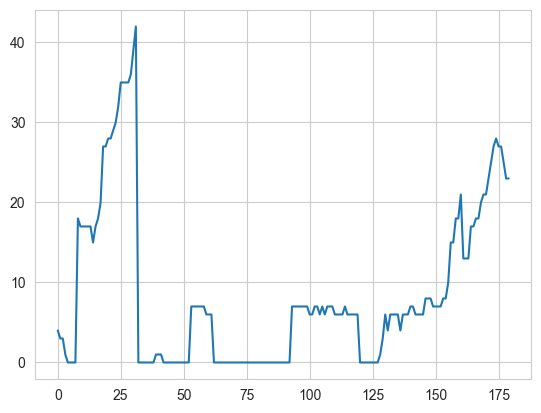

Potential turnoff times
[3, 4, 32, 42, 62, 120]
[4, 3, 3]
-0.4999999999999997
3.8333333333333326
Decreasing
xxxxx
[1]
[0, 0, 0, 0, 18, 17, 17, 17, 17, 17, 15, 17, 18, 20, 27, 27, 28, 28, 29, 30, 32, 35, 35, 35, 35, 36, 39, 42]
1.4222769567597153
3.3349753694581246
Increasing
xxxxx
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
0.12727272727272723
-0.2727272727272724
Increasing
xxxxx
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 7, 7, 7, 7, 6, 6, 6]
0.48270676691729325
-1.5857142857142839
Increasing
xxxxx
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 7, 7, 7, 7, 7, 6, 6, 7, 7, 6, 7, 6, 7, 7, 7, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6]
0.1638930757636347
-1.6364699006429007
Increasing
xxxxx
[0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 6, 4, 6, 6, 6, 6, 4, 6, 6, 6, 7, 7, 6, 6, 6, 6, 8, 8, 8, 7, 7, 7, 7, 8, 8, 10, 15, 15, 18, 18, 21, 13, 13, 13, 17, 17, 18, 18, 20, 21, 21, 23, 25, 27, 28, 27, 27, 25, 23, 23]
0.459849958321756
-2.5322404371584715
Increasing
xxxxx
Raw measurements plt

/Users/adelh/PycharmProjects/Analyst_task/venv/lib/python3.9/site-packages/numpy/lib/polynomial.py:668: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


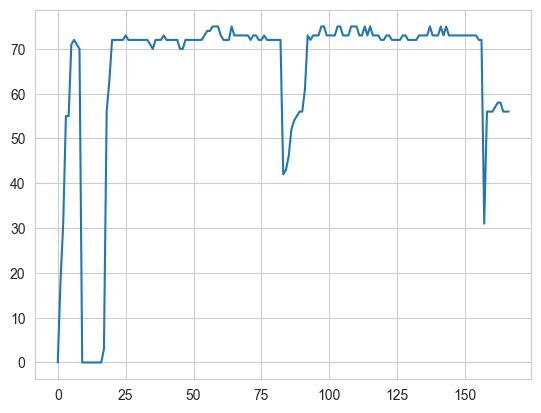

Potential turnoff times
[9]
[0, 18, 31, 55, 55, 71, 72, 71, 70]
8.950000000000001
13.422222222222215
Increasing
xxxxx
[0, 0, 0, 0, 0, 0, 0, 0, 3, 56, 63, 72, 72, 72, 72, 72, 73, 72, 72, 72, 72, 72, 72, 72, 72, 71, 70, 72, 72, 72, 73, 72, 72, 72, 72, 72, 70, 70, 72, 72, 72, 72, 72, 72, 72, 73, 74, 74, 75, 75, 75, 73, 72, 72, 72, 75, 73, 73, 73, 73, 73, 73, 72, 73, 73, 72, 72, 73, 72, 72, 72, 72, 72, 72, 42, 43, 46, 52, 54, 55, 56, 56, 61, 73, 72, 73, 73, 73, 75, 75, 73, 73, 73, 73, 75, 75, 73, 73, 73, 75, 75, 75, 73, 73, 75, 73, 75, 73, 73, 73, 72, 72, 73, 73, 72, 72, 72, 72, 73, 73, 72, 72, 72, 72, 73, 73, 73, 73, 75, 73, 73, 73, 75, 73, 75, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 72, 72, 31, 56, 56, 56, 57, 58, 58, 56, 56, 56]
0.11820177406866002
56.80343921662282
Increasing
xxxxx
Raw measurements plt


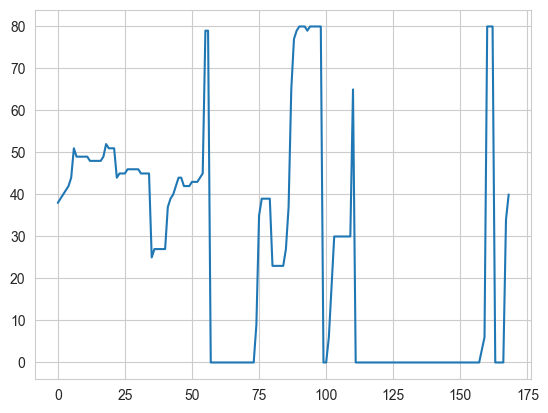

Potential turnoff times
[57, 99, 111, 163]
[38, 39, 40, 41, 42, 44, 51, 49, 49, 49, 49, 49, 48, 48, 48, 48, 48, 49, 52, 51, 51, 51, 44, 45, 45, 45, 46, 46, 46, 46, 46, 45, 45, 45, 45, 25, 27, 27, 27, 27, 27, 37, 39, 40, 42, 44, 44, 42, 42, 42, 43, 43, 43, 44, 45, 79, 79]
-0.009722582317863519
44.675741076829986
Non-decreasing/Non-increasing
xxxxx
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 35, 39, 39, 39, 39, 23, 23, 23, 23, 23, 27, 37, 65, 77, 79, 80, 80, 80, 79, 80, 80, 80, 80, 80]
2.4494773519163755
-18.80952380952382
Increasing
xxxxx
[0, 0, 6, 18, 30, 30, 30, 30, 30, 30, 30, 65]
4.241258741258741
1.589743589743602
Increasing
xxxxx
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 6, 80, 80, 80]
0.5190386749765217
-8.447024673439772
Increasing
xxxxx
[0, 0, 0, 0, 34, 40]
8.62857142857143
-9.238095238095243
Increasing
xxxxx
Raw measurements plt


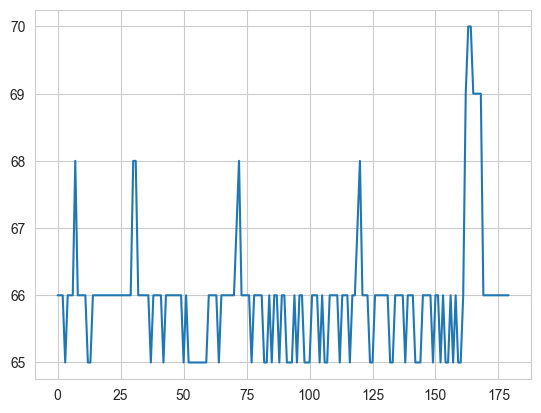

Potential turnoff times
[]
[66, 66, 66, 65, 66, 66, 66, 68, 66, 66, 66, 66, 65, 65, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 68, 68, 66, 66, 66, 66, 66, 65, 66, 66, 66, 66, 65, 66, 66, 66, 66, 66, 66, 66, 65, 66, 65, 65, 65, 65, 65, 65, 65, 65, 66, 66, 66, 66, 65, 66, 66, 66, 66, 66, 66, 67, 68, 66, 66, 66, 66, 65, 66, 66, 66, 66, 65, 65, 66, 65, 66, 66, 65, 66, 66, 65, 65, 65, 66, 65, 66, 66, 65, 65, 65, 66, 66, 66, 65, 66, 65, 65, 66, 66, 66, 66, 65, 66, 66, 66, 65, 66, 66, 67, 68, 66, 66, 66, 65, 65, 66, 66, 66, 66, 66, 66, 65, 65, 66, 66, 66, 66, 65, 66, 66, 66, 65, 65, 65, 66, 66, 66, 66, 65, 66, 66, 65, 66, 65, 65, 66, 65, 66, 65, 65, 66, 69, 70, 70, 69, 69, 69, 69, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66]
0.0022963671718265717
65.72780847145484
Non-decreasing/Non-increasing
xxxxx
Raw measurements plt


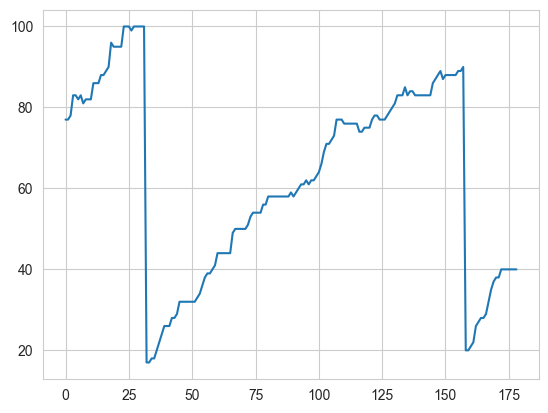

Potential turnoff times
[32, 158]
[77, 77, 78, 83, 83, 82, 83, 81, 82, 82, 82, 86, 86, 86, 88, 88, 89, 90, 96, 95, 95, 95, 95, 100, 100, 100, 99, 100, 100, 100, 100, 100]
0.8387096774193534
76.93749999999997
Increasing
xxxxx
[17, 17, 18, 18, 20, 22, 24, 26, 26, 26, 28, 28, 29, 32, 32, 32, 32, 32, 32, 32, 33, 34, 36, 38, 39, 39, 40, 41, 44, 44, 44, 44, 44, 44, 49, 50, 50, 50, 50, 50, 51, 53, 54, 54, 54, 54, 56, 56, 58, 58, 58, 58, 58, 58, 58, 58, 58, 59, 58, 59, 60, 61, 61, 62, 61, 62, 62, 63, 64, 66, 69, 71, 71, 72, 73, 77, 77, 77, 76, 76, 76, 76, 76, 76, 74, 74, 75, 75, 75, 77, 78, 78, 77, 77, 77, 78, 79, 80, 81, 83, 83, 83, 85, 83, 84, 84, 83, 83, 83, 83, 83, 83, 83, 86, 87, 88, 89, 87, 88, 88, 88, 88, 88, 89, 89, 90]
0.5667641544806903
25.267716535433085
Increasing
xxxxx
[20, 20, 21, 22, 26, 27, 28, 28, 29, 32, 35, 37, 38, 38, 40, 40, 40, 40, 40, 40, 40]
1.1792207792207787
20.63636363636364
Increasing
xxxxx
Raw measurements plt


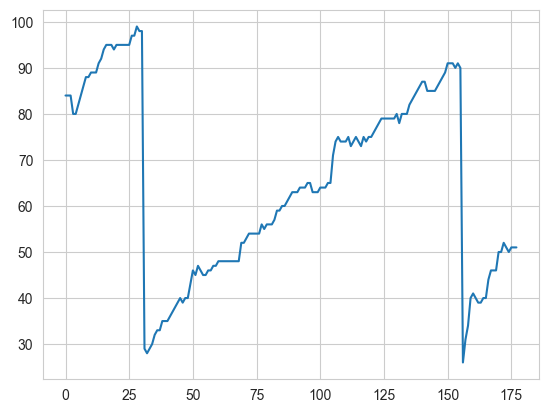

Potential turnoff times
[31, 156]
[84, 84, 84, 80, 80, 82, 84, 86, 88, 88, 89, 89, 89, 91, 92, 94, 95, 95, 95, 94, 95, 95, 95, 95, 95, 95, 97, 97, 99, 98, 98]
0.589919354838709
82.18346774193546
Increasing
xxxxx
[29, 28, 29, 30, 32, 33, 33, 35, 35, 35, 36, 37, 38, 39, 40, 39, 40, 40, 43, 46, 45, 47, 46, 45, 45, 46, 46, 47, 47, 48, 48, 48, 48, 48, 48, 48, 48, 48, 52, 52, 53, 54, 54, 54, 54, 54, 56, 55, 56, 56, 56, 57, 59, 59, 60, 60, 61, 62, 63, 63, 63, 64, 64, 64, 65, 65, 63, 63, 63, 64, 64, 64, 65, 65, 71, 74, 75, 74, 74, 74, 75, 73, 74, 75, 74, 73, 75, 74, 75, 75, 76, 77, 78, 79, 79, 79, 79, 79, 79, 80, 78, 80, 80, 80, 82, 83, 84, 85, 86, 87, 87, 85, 85, 85, 85, 86, 87, 88, 89, 91, 91, 91, 90, 91, 90]
0.48475576036866347
32.54514285714285
Increasing
xxxxx
[26, 31, 34, 40, 41, 40, 39, 39, 40, 40, 44, 46, 46, 46, 50, 50, 52, 51, 50, 51, 51, 51]
1.0344438170525128
32.68379446640314
Increasing
xxxxx
Raw measurements plt


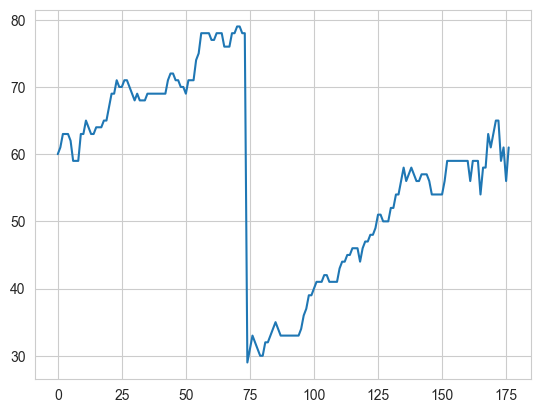

Potential turnoff times
[74]
[60, 61, 63, 63, 63, 62, 59, 59, 59, 63, 63, 65, 64, 63, 63, 64, 64, 64, 65, 65, 67, 69, 69, 71, 70, 70, 71, 71, 70, 69, 68, 69, 68, 68, 68, 69, 69, 69, 69, 69, 69, 69, 69, 71, 72, 72, 71, 71, 70, 70, 69, 71, 71, 71, 74, 75, 78, 78, 78, 78, 77, 77, 78, 78, 78, 76, 76, 76, 78, 78, 79, 79, 78, 78]
0.24710847834135466
60.818378378378384
Increasing
xxxxx
[29, 31, 33, 32, 31, 30, 30, 32, 32, 33, 34, 35, 34, 33, 33, 33, 33, 33, 33, 33, 33, 34, 36, 37, 39, 39, 40, 41, 41, 41, 42, 42, 41, 41, 41, 41, 43, 44, 44, 45, 45, 46, 46, 46, 44, 46, 47, 47, 48, 48, 49, 51, 51, 50, 50, 50, 52, 52, 54, 54, 56, 58, 56, 57, 58, 57, 56, 56, 57, 57, 57, 56, 54, 54, 54, 54, 54, 56, 59, 59, 59, 59, 59, 59, 59, 59, 59, 56, 59, 59, 59, 54, 58, 58, 63, 61, 63, 65, 65, 59, 61, 56, 61]
0.338707551728683
30.52203136669154
Increasing
xxxxx
Raw measurements plt


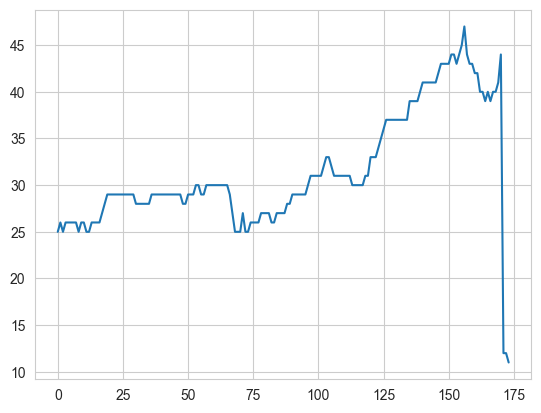

Potential turnoff times
[171]
[25, 26, 25, 26, 26, 26, 26, 26, 25, 26, 26, 25, 25, 26, 26, 26, 26, 27, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 28, 28, 29, 29, 29, 30, 30, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 29, 27, 25, 25, 25, 27, 25, 25, 26, 26, 26, 26, 27, 27, 27, 27, 26, 26, 27, 27, 27, 27, 28, 28, 29, 29, 29, 29, 29, 29, 30, 31, 31, 31, 31, 31, 32, 33, 33, 32, 31, 31, 31, 31, 31, 31, 31, 30, 30, 30, 30, 30, 31, 31, 33, 33, 33, 34, 35, 36, 37, 37, 37, 37, 37, 37, 37, 37, 37, 39, 39, 39, 39, 40, 41, 41, 41, 41, 41, 41, 42, 43, 43, 43, 43, 44, 44, 43, 44, 45, 47, 44, 43, 43, 42, 42, 40, 40, 39, 40, 39, 40, 40, 41, 44]
0.09950800393596863
23.407316741466058
Increasing
xxxxx
[12, 12, 11]
-0.4999999999999981
12.166666666666666
Decreasing
xxxxx
Raw measurements plt


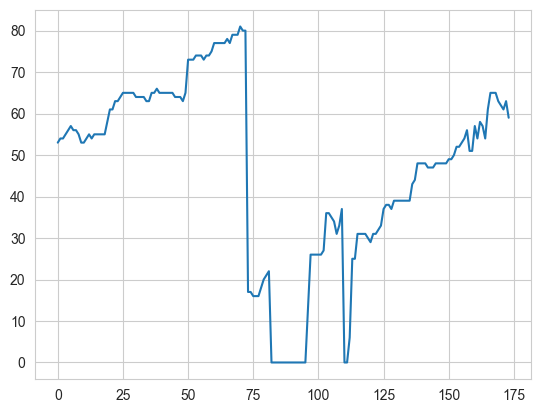

Potential turnoff times
[73, 82, 110]
[53, 54, 54, 55, 56, 57, 56, 56, 55, 53, 53, 54, 55, 54, 55, 55, 55, 55, 55, 58, 61, 61, 63, 63, 64, 65, 65, 65, 65, 65, 64, 64, 64, 64, 63, 63, 65, 65, 66, 65, 65, 65, 65, 65, 65, 64, 64, 64, 63, 65, 73, 73, 73, 74, 74, 74, 73, 74, 74, 75, 77, 77, 77, 77, 77, 78, 77, 79, 79, 79, 81, 80, 80]
0.38337652721214416
51.65049981488335
Increasing
xxxxx
[17, 17, 16, 16, 16, 18, 20, 21, 22]
0.6999999999999987
15.311111111111112
Increasing
xxxxx
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13, 26, 26, 26, 26, 26, 27, 36, 36, 35, 34, 31, 33, 37]
1.7356321839080457
-8.716748768472918
Increasing
xxxxx
[0, 0, 6, 25, 25, 31, 31, 31, 31, 30, 29, 31, 31, 32, 33, 37, 38, 38, 37, 39, 39, 39, 39, 39, 39, 39, 43, 44, 48, 48, 48, 48, 47, 47, 47, 48, 48, 48, 48, 48, 49, 49, 50, 52, 52, 53, 54, 56, 51, 51, 57, 54, 58, 57, 54, 61, 65, 65, 65, 63, 62, 61, 63, 59]
0.7079670329670332
21.605288461538446
Increasing
xxxxx
Raw measurements plt


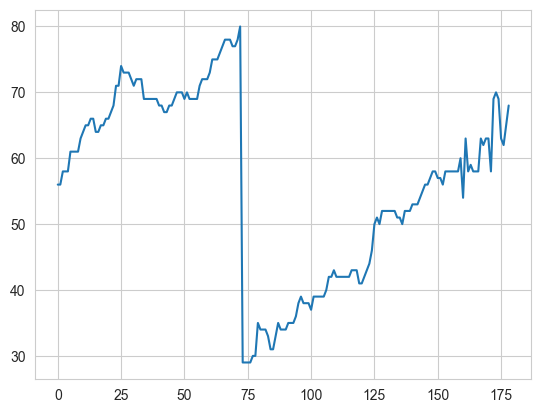

Potential turnoff times
[73]
[56, 56, 58, 58, 58, 61, 61, 61, 61, 63, 64, 65, 65, 66, 66, 64, 64, 65, 65, 66, 66, 67, 68, 71, 71, 74, 73, 73, 73, 72, 71, 72, 72, 72, 69, 69, 69, 69, 69, 69, 68, 68, 67, 67, 68, 68, 69, 70, 70, 70, 69, 70, 69, 69, 69, 69, 71, 72, 72, 72, 73, 75, 75, 75, 76, 77, 78, 78, 78, 77, 77, 78, 80]
0.21923978773293892
61.09366901147721
Increasing
xxxxx
[29, 29, 29, 29, 30, 30, 35, 34, 34, 34, 33, 31, 31, 33, 35, 34, 34, 34, 35, 35, 35, 36, 38, 39, 38, 38, 38, 37, 39, 39, 39, 39, 39, 40, 42, 42, 43, 42, 42, 42, 42, 42, 42, 43, 43, 43, 41, 41, 42, 43, 44, 46, 50, 51, 50, 52, 52, 52, 52, 52, 52, 51, 51, 50, 52, 52, 52, 53, 53, 53, 54, 55, 56, 56, 57, 58, 58, 57, 57, 56, 58, 58, 58, 58, 58, 58, 60, 54, 63, 58, 59, 58, 58, 58, 63, 62, 63, 63, 58, 69, 70, 69, 63, 62, 65, 68]
0.3532962188578478
28.92364662317052
Increasing
xxxxx
Raw measurements plt


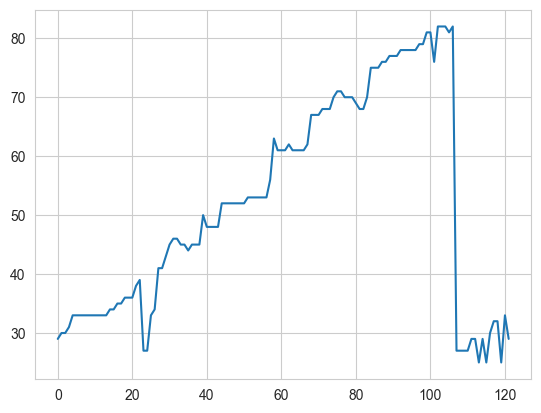

Potential turnoff times
[107]
[29, 30, 30, 31, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 34, 34, 35, 35, 36, 36, 36, 38, 39, 27, 27, 33, 34, 41, 41, 43, 45, 46, 46, 45, 45, 44, 45, 45, 45, 50, 48, 48, 48, 48, 52, 52, 52, 52, 52, 52, 52, 53, 53, 53, 53, 53, 53, 56, 63, 61, 61, 61, 62, 61, 61, 61, 61, 62, 67, 67, 67, 68, 68, 68, 70, 71, 71, 70, 70, 70, 69, 68, 68, 70, 75, 75, 75, 76, 76, 77, 77, 77, 78, 78, 78, 78, 78, 79, 79, 81, 81, 76, 82, 82, 82, 81, 82]
0.544740296635906
26.49325025960538
Increasing
xxxxx
[27, 27, 27, 27, 29, 29, 25, 29, 25, 30, 32, 32, 25, 33, 29]
0.25357142857142967
26.624999999999993
Increasing
xxxxx
Raw measurements plt


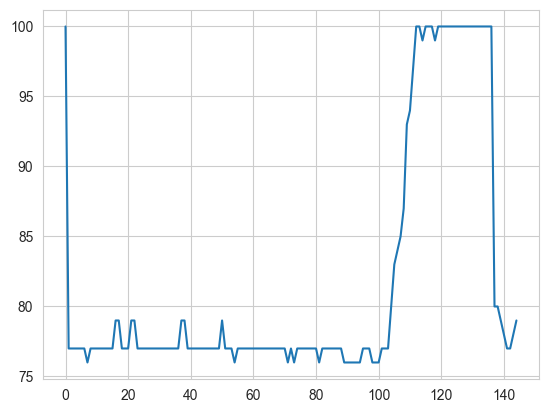

Potential turnoff times
[]
[100, 77, 77, 77, 77, 77, 77, 76, 77, 77, 77, 77, 77, 77, 77, 77, 79, 79, 77, 77, 77, 79, 79, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 79, 79, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 79, 77, 77, 77, 76, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 76, 77, 76, 77, 77, 77, 77, 77, 77, 77, 76, 77, 77, 77, 77, 77, 77, 77, 76, 76, 76, 76, 76, 76, 77, 77, 77, 76, 76, 76, 77, 77, 77, 80, 83, 84, 85, 87, 93, 94, 97, 100, 100, 99, 100, 100, 100, 99, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 80, 80, 79, 78, 77, 77, 78, 79]
0.12370492835773896
72.88634860651868
Increasing
xxxxx
Raw measurements plt


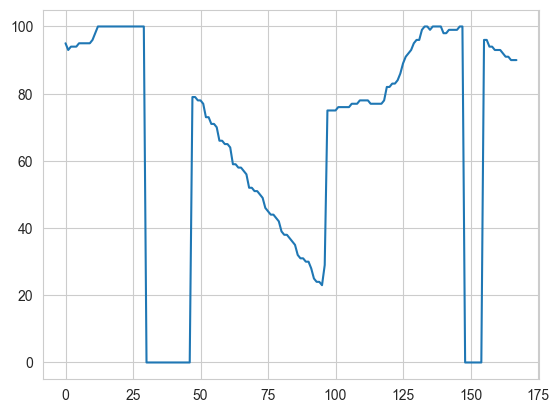

Potential turnoff times
[30, 148]
[95, 93, 94, 94, 94, 95, 95, 95, 95, 95, 96, 98, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
0.26095661846496043
94.18279569892475
Increasing
xxxxx
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 79, 79, 78, 78, 77, 73, 73, 71, 71, 70, 66, 66, 65, 65, 64, 59, 59, 58, 58, 57, 56, 52, 52, 51, 51, 50, 49, 46, 45, 44, 44, 43, 42, 39, 38, 38, 37, 36, 35, 32, 31, 31, 30, 30, 28, 25, 24, 24, 23, 29, 75, 75, 75, 75, 76, 76, 76, 76, 76, 77, 77, 77, 78, 78, 78, 78, 77, 77, 77, 77, 77, 78, 82, 82, 83, 83, 84, 86, 89, 91, 92, 93, 95, 96, 96, 99, 100, 100, 99, 100, 100, 100, 100, 98, 98, 99, 99, 99, 99, 100, 100]
0.733437051482914
15.983762996724113
Increasing
xxxxx
[0, 0, 0, 0, 0, 0, 0, 96, 96, 94, 94, 93, 93, 93, 92, 91, 91, 90, 90, 90]
6.1872180451127825
1.3714285714285959
Increasing
xxxxx
Raw measurements plt


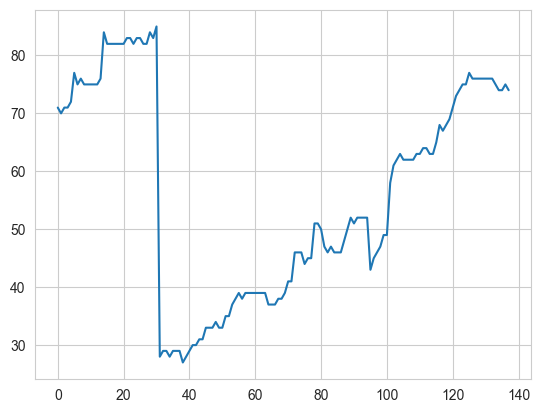

Potential turnoff times
[31]
[71, 70, 71, 71, 72, 77, 75, 76, 75, 75, 75, 75, 75, 76, 84, 82, 82, 82, 82, 82, 82, 83, 83, 82, 83, 83, 82, 82, 84, 83, 85]
0.4762096774193542
71.5665322580645
Increasing
xxxxx
[28, 29, 29, 28, 29, 29, 29, 27, 28, 29, 30, 30, 31, 31, 33, 33, 33, 34, 33, 33, 35, 35, 37, 38, 39, 38, 39, 39, 39, 39, 39, 39, 39, 37, 37, 37, 38, 38, 39, 41, 41, 46, 46, 46, 44, 45, 45, 51, 51, 50, 47, 46, 47, 46, 46, 46, 48, 50, 52, 51, 52, 52, 52, 52, 43, 45, 46, 47, 49, 49, 58, 61, 62, 63, 62, 62, 62, 62, 63, 63, 64, 64, 63, 63, 65, 68, 67, 68, 69, 71, 73, 74, 75, 75, 77, 76, 76, 76, 76, 76, 76, 76, 75, 74, 74, 75, 74]
0.4918199807989969
23.998961578400806
Increasing
xxxxx
Raw measurements plt


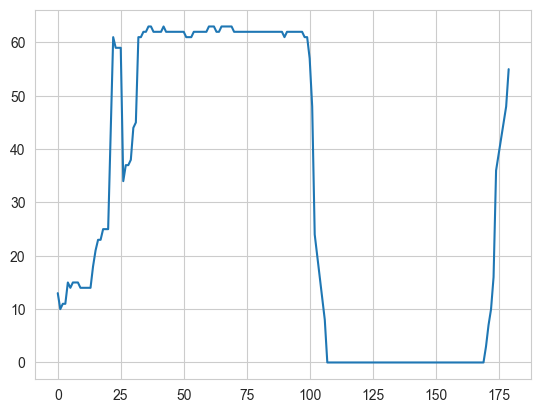

Potential turnoff times
[107]
[13, 10, 11, 11, 15, 14, 15, 15, 15, 14, 14, 14, 14, 14, 18, 21, 23, 23, 25, 25, 25, 43, 61, 59, 59, 59, 34, 37, 37, 38, 44, 45, 61, 61, 62, 62, 63, 63, 62, 62, 62, 62, 63, 62, 62, 62, 62, 62, 62, 62, 62, 61, 61, 61, 62, 62, 62, 62, 62, 62, 63, 63, 63, 62, 62, 63, 63, 63, 63, 63, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 61, 62, 62, 62, 62, 62, 62, 62, 61, 61, 57, 48, 24, 20, 16, 12, 8]
0.3243010247065971
32.055036344755955
Increasing
xxxxx
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 7, 10, 16, 36, 39, 42, 45, 48, 55]
0.30812661977045536
-6.969270640503512
Increasing
xxxxx
Raw measurements plt


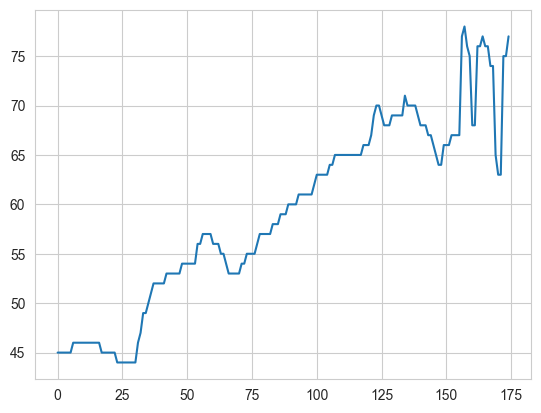

Potential turnoff times
[]
[45, 45, 45, 45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 45, 45, 45, 45, 45, 45, 44, 44, 44, 44, 44, 44, 44, 44, 46, 47, 49, 49, 50, 51, 52, 52, 52, 52, 52, 53, 53, 53, 53, 53, 53, 54, 54, 54, 54, 54, 54, 56, 56, 57, 57, 57, 57, 56, 56, 56, 55, 55, 54, 53, 53, 53, 53, 53, 54, 54, 55, 55, 55, 55, 56, 57, 57, 57, 57, 57, 58, 58, 58, 59, 59, 59, 60, 60, 60, 60, 61, 61, 61, 61, 61, 61, 62, 63, 63, 63, 63, 63, 64, 64, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 66, 66, 66, 67, 69, 70, 70, 69, 68, 68, 68, 69, 69, 69, 69, 69, 71, 70, 70, 70, 70, 69, 68, 68, 68, 67, 67, 66, 65, 64, 64, 66, 66, 66, 67, 67, 67, 67, 77, 78, 76, 75, 68, 68, 76, 76, 77, 76, 76, 74, 74, 65, 63, 63, 75, 75, 77]
0.17861397223466186
43.54058441558444
Increasing
xxxxx
Raw measurements plt


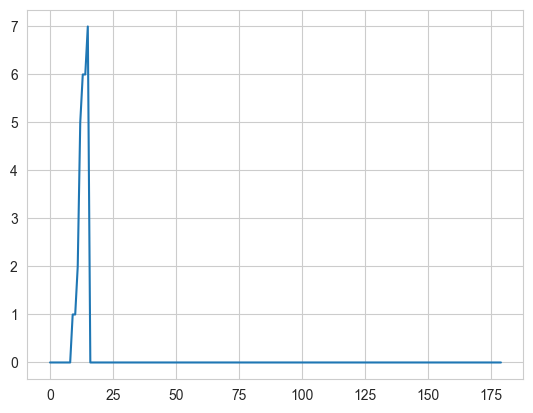

Potential turnoff times
[16]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 5, 6, 6, 7]
0.46470588235294114
-1.7352941176470598
Increasing
xxxxx
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0.0
0.0
Non-decreasing/Non-increasing
xxxxx
Raw measurements plt


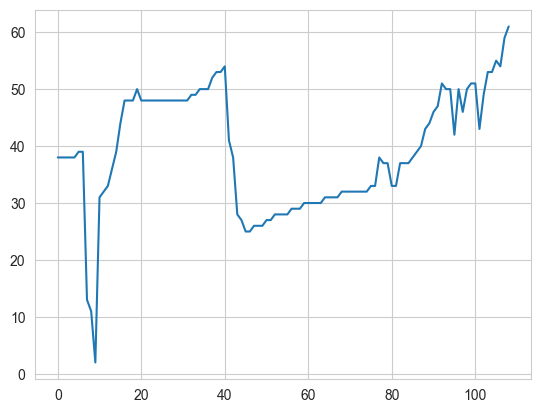

Potential turnoff times
[7]
[38, 38, 38, 38, 38, 39, 39]
0.17857142857142402
37.75000000000003
Increasing
xxxxx
[13, 11, 2, 31, 32, 33, 36, 39, 44, 48, 48, 48, 50, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 50, 50, 50, 52, 53, 53, 54, 41, 38, 28, 27, 25, 25, 26, 26, 26, 27, 27, 28, 28, 28, 28, 29, 29, 29, 30, 30, 30, 30, 30, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 33, 33, 38, 37, 37, 33, 33, 37, 37, 37, 38, 39, 40, 43, 44, 46, 47, 51, 50, 50, 42, 50, 46, 50, 51, 51, 43, 49, 53, 53, 55, 54, 59, 61]
0.08376542965547264
35.024747763182944
Increasing
xxxxx
Raw measurements plt


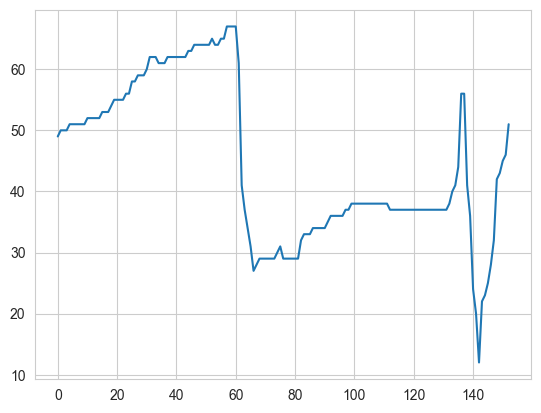

Potential turnoff times
[]
[49, 50, 50, 50, 51, 51, 51, 51, 51, 51, 52, 52, 52, 52, 52, 53, 53, 53, 54, 55, 55, 55, 55, 56, 56, 58, 58, 59, 59, 59, 60, 62, 62, 62, 61, 61, 61, 62, 62, 62, 62, 62, 62, 62, 63, 63, 64, 64, 64, 64, 64, 64, 65, 64, 64, 65, 65, 67, 67, 67, 67, 61, 41, 37, 34, 31, 27, 28, 29, 29, 29, 29, 29, 29, 30, 31, 29, 29, 29, 29, 29, 29, 32, 33, 33, 33, 34, 34, 34, 34, 34, 35, 36, 36, 36, 36, 36, 37, 37, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 38, 40, 41, 44, 56, 56, 41, 36, 24, 20, 12, 22, 23, 25, 28, 32, 42, 43, 45, 46, 51]
-0.18532293300095123
58.68585009761475
Decreasing
xxxxx
Raw measurements plt


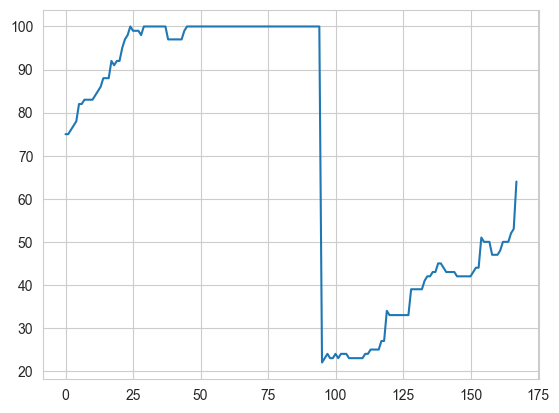

Potential turnoff times
[95]
[75, 75, 76, 77, 78, 82, 82, 83, 83, 83, 83, 84, 85, 86, 88, 88, 88, 92, 91, 92, 92, 95, 97, 98, 100, 99, 99, 99, 98, 100, 100, 100, 100, 100, 100, 100, 100, 100, 97, 97, 97, 97, 97, 97, 99, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
0.19063549832026885
87.13486842105262
Increasing
xxxxx
[22, 23, 24, 23, 23, 24, 23, 24, 24, 24, 23, 23, 23, 23, 23, 23, 24, 24, 25, 25, 25, 25, 27, 27, 34, 33, 33, 33, 33, 33, 33, 33, 33, 39, 39, 39, 39, 39, 41, 42, 42, 43, 43, 45, 45, 44, 43, 43, 43, 43, 42, 42, 42, 42, 42, 42, 43, 44, 44, 51, 50, 50, 50, 47, 47, 47, 48, 50, 50, 50, 52, 53, 64]
0.4734974700728126
19.611625323954083
Increasing
xxxxx
Raw measurements plt


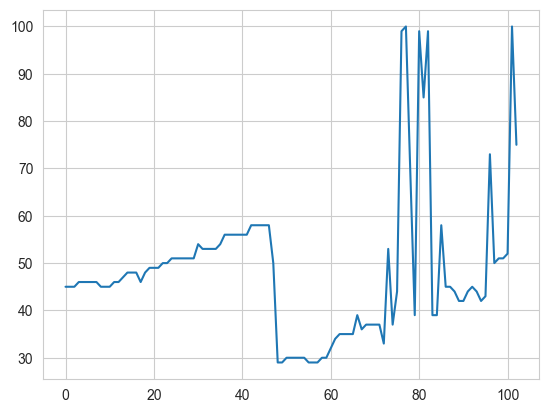

Potential turnoff times
[83]
[45, 45, 45, 46, 46, 46, 46, 46, 45, 45, 45, 46, 46, 47, 48, 48, 48, 46, 48, 49, 49, 49, 50, 50, 51, 51, 51, 51, 51, 51, 54, 53, 53, 53, 53, 54, 56, 56, 56, 56, 56, 56, 58, 58, 58, 58, 58, 50, 29, 29, 30, 30, 30, 30, 30, 29, 29, 29, 30, 30, 32, 34, 35, 35, 35, 35, 39, 36, 37, 37, 37, 37, 33, 53, 37, 44, 99, 100, 69, 39, 99, 85, 99]
0.06542546492590551
45.11273666092943
Increasing
xxxxx
[39, 39, 58, 45, 45, 44, 42, 42, 44, 45, 44, 42, 43, 73, 50, 51, 51, 52, 100, 75]
1.5368421052631576
36.60000000000001
Increasing
xxxxx
Raw measurements plt


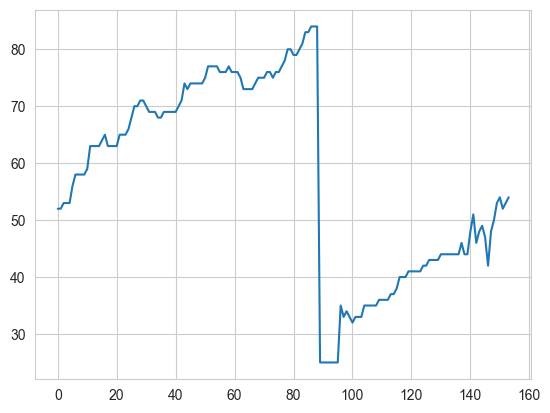

Potential turnoff times
[89]
[52, 52, 53, 53, 53, 56, 58, 58, 58, 58, 59, 63, 63, 63, 63, 64, 65, 63, 63, 63, 63, 65, 65, 65, 66, 68, 70, 70, 71, 71, 70, 69, 69, 69, 68, 68, 69, 69, 69, 69, 69, 70, 71, 74, 73, 74, 74, 74, 74, 74, 75, 77, 77, 77, 77, 76, 76, 76, 77, 76, 76, 76, 75, 73, 73, 73, 73, 74, 75, 75, 75, 76, 76, 75, 76, 76, 77, 78, 80, 80, 79, 79, 80, 81, 83, 83, 84, 84, 84]
0.28653387810691267
57.98801498127334
Increasing
xxxxx
[25, 25, 25, 25, 25, 25, 25, 35, 33, 34, 33, 32, 33, 33, 33, 35, 35, 35, 35, 35, 36, 36, 36, 36, 37, 37, 38, 40, 40, 40, 41, 41, 41, 41, 41, 42, 42, 43, 43, 43, 43, 44, 44, 44, 44, 44, 44, 44, 46, 44, 44, 48, 51, 46, 48, 49, 47, 42, 48, 50, 53, 54, 52, 53, 54]
0.3941870629370626
27.232167832167843
Increasing
xxxxx
Raw measurements plt


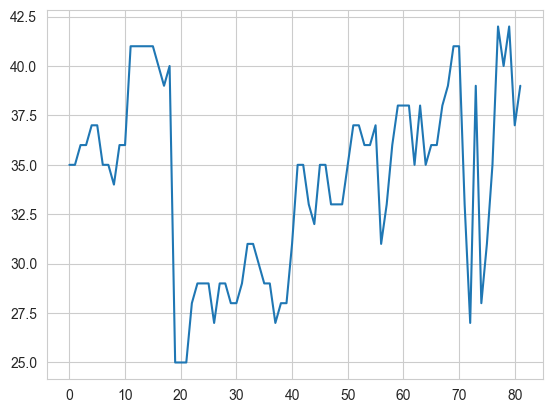

Potential turnoff times
[]
[35, 35, 36, 36, 37, 37, 35, 35, 34, 36, 36, 41, 41, 41, 41, 41, 40, 39, 40, 25, 25, 25, 28, 29, 29, 29, 27, 29, 29, 28, 28, 29, 31, 31, 30, 29, 29, 27, 28, 28, 31, 35, 35, 33, 32, 35, 35, 33, 33, 33, 35, 37, 37, 36, 36, 37, 31, 33, 36, 38, 38, 38, 35, 38, 35, 36, 36, 38, 39, 41, 41, 33, 27, 39, 28, 31, 35, 42, 40, 42, 37, 39]
0.0331951110675767
32.89950044078755
Non-decreasing/Non-increasing
xxxxx
Raw measurements plt


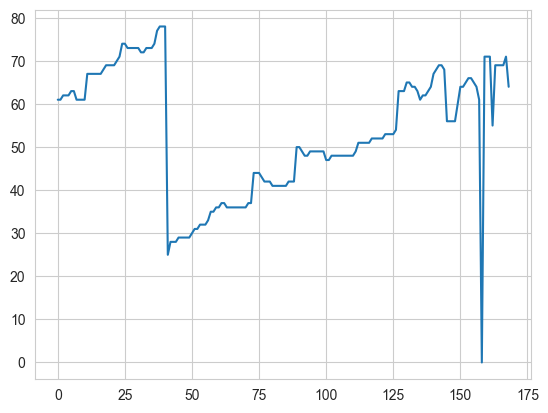

Potential turnoff times
[41]
[61, 61, 62, 62, 62, 63, 63, 61, 61, 61, 61, 67, 67, 67, 67, 67, 67, 68, 69, 69, 69, 69, 70, 71, 74, 74, 73, 73, 73, 73, 73, 72, 72, 73, 73, 73, 74, 77, 78, 78, 78]
0.43048780487805033
60.317073170731696
Increasing
xxxxx
[25, 28, 28, 28, 29, 29, 29, 29, 29, 30, 31, 31, 32, 32, 32, 33, 35, 35, 36, 36, 37, 37, 36, 36, 36, 36, 36, 36, 36, 36, 37, 37, 44, 44, 44, 43, 42, 42, 42, 41, 41, 41, 41, 41, 41, 42, 42, 42, 50, 50, 49, 48, 48, 49, 49, 49, 49, 49, 49, 47, 47, 48, 48, 48, 48, 48, 48, 48, 48, 48, 49, 51, 51, 51, 51, 51, 52, 52, 52, 52, 52, 53, 53, 53, 53, 54, 63, 63, 63, 65, 65, 64, 64, 63, 61, 62, 62, 63, 64, 67, 68, 69, 69, 68, 56, 56, 56, 56, 60, 64, 64, 65, 66, 66, 65, 64, 61, 0, 71, 71, 71, 55, 69, 69, 69, 69, 71, 64]
0.3095243545138253
29.267078488372093
Increasing
xxxxx
Raw measurements plt


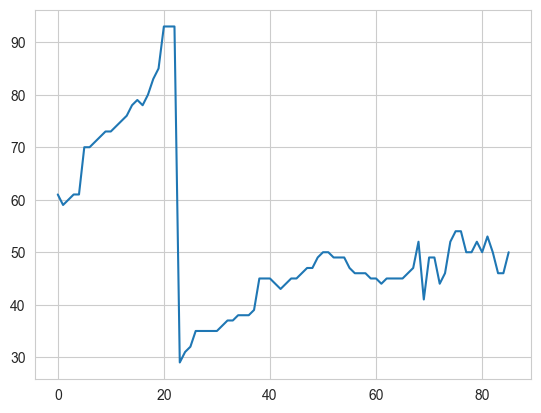

Potential turnoff times
[23]
[61, 59, 60, 61, 61, 70, 70, 71, 72, 73, 73, 74, 75, 76, 78, 79, 78, 80, 83, 85, 93, 93, 93]
1.475296442687748
58.46739130434785
Increasing
xxxxx
[29, 31, 32, 35, 35, 35, 35, 35, 36, 37, 37, 38, 38, 38, 39, 45, 45, 45, 44, 43, 44, 45, 45, 46, 47, 47, 49, 50, 50, 49, 49, 49, 47, 46, 46, 46, 45, 45, 44, 45, 45, 45, 45, 46, 47, 52, 41, 49, 49, 44, 46, 52, 54, 54, 50, 50, 52, 50, 53, 50, 46, 46, 50]
0.26123271889400984
36.37797619047618
Increasing
xxxxx
Raw measurements plt


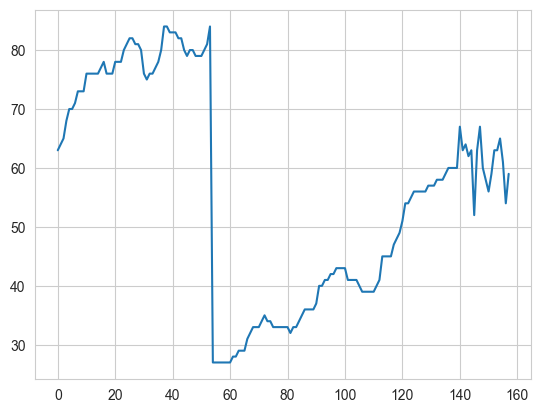

Potential turnoff times
[54]
[63, 64, 65, 68, 70, 70, 71, 73, 73, 73, 76, 76, 76, 76, 76, 77, 78, 76, 76, 76, 78, 78, 78, 80, 81, 82, 82, 81, 81, 80, 76, 75, 76, 76, 77, 78, 80, 84, 84, 83, 83, 83, 82, 82, 80, 79, 80, 80, 79, 79, 79, 80, 81, 84]
0.24333905088622085
70.84781144781142
Increasing
xxxxx
[27, 27, 27, 27, 27, 27, 27, 28, 28, 29, 29, 29, 31, 32, 33, 33, 33, 34, 35, 34, 34, 33, 33, 33, 33, 33, 33, 32, 33, 33, 34, 35, 36, 36, 36, 36, 37, 40, 40, 41, 41, 42, 42, 43, 43, 43, 43, 41, 41, 41, 41, 40, 39, 39, 39, 39, 39, 40, 41, 45, 45, 45, 45, 47, 48, 49, 51, 54, 54, 55, 56, 56, 56, 56, 56, 57, 57, 57, 58, 58, 58, 59, 60, 60, 60, 60, 67, 63, 64, 62, 63, 52, 63, 67, 60, 58, 56, 59, 63, 63, 65, 61, 54, 59]
0.385554251573669
24.72087912087913
Increasing
xxxxx
Raw measurements plt


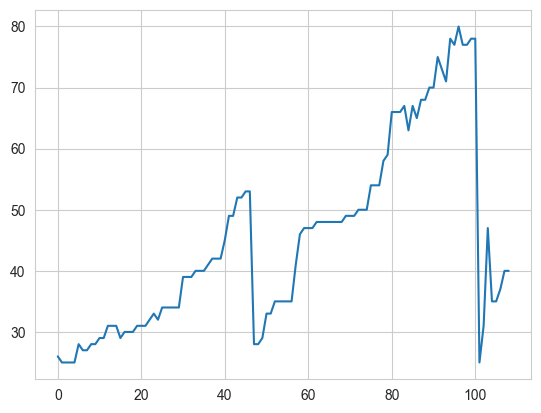

Potential turnoff times
[101]
[26, 25, 25, 25, 25, 28, 27, 27, 28, 28, 29, 29, 31, 31, 31, 29, 30, 30, 30, 31, 31, 31, 32, 33, 32, 34, 34, 34, 34, 34, 39, 39, 39, 40, 40, 40, 41, 42, 42, 42, 45, 49, 49, 52, 52, 53, 53, 28, 28, 29, 33, 33, 35, 35, 35, 35, 35, 41, 46, 47, 47, 47, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 50, 50, 50, 54, 54, 54, 58, 59, 66, 66, 66, 67, 63, 67, 65, 68, 68, 70, 70, 75, 73, 71, 78, 77, 80, 77, 77, 78, 78]
0.4954688410017473
20.939429237041363
Increasing
xxxxx
[25, 31, 47, 35, 35, 37, 40, 40]
1.428571428571431
31.24999999999998
Increasing
xxxxx
Raw measurements plt


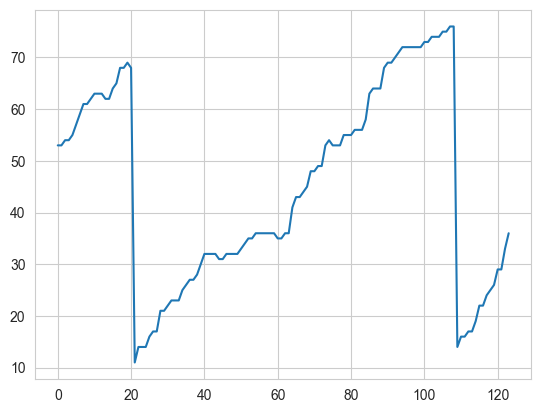

Potential turnoff times
[21, 109]
[53, 53, 54, 54, 55, 57, 59, 61, 61, 62, 63, 63, 63, 62, 62, 64, 65, 68, 68, 69, 68]
0.803896103896104
53.10389610389612
Increasing
xxxxx
[11, 14, 14, 14, 16, 17, 17, 21, 21, 22, 23, 23, 23, 25, 26, 27, 27, 28, 30, 32, 32, 32, 32, 31, 31, 32, 32, 32, 32, 33, 34, 35, 35, 36, 36, 36, 36, 36, 36, 35, 35, 36, 36, 41, 43, 43, 44, 45, 48, 48, 49, 49, 53, 54, 53, 53, 53, 55, 55, 55, 56, 56, 56, 58, 63, 64, 64, 64, 68, 69, 69, 70, 71, 72, 72, 72, 72, 72, 72, 73, 73, 74, 74, 74, 75, 75, 76, 76]
0.7464425346060374
12.791113381001018
Increasing
xxxxx
[14, 16, 16, 17, 17, 19, 22, 22, 24, 25, 26, 29, 29, 33, 36]
1.4642857142857144
12.749999999999996
Increasing
xxxxx
Raw measurements plt


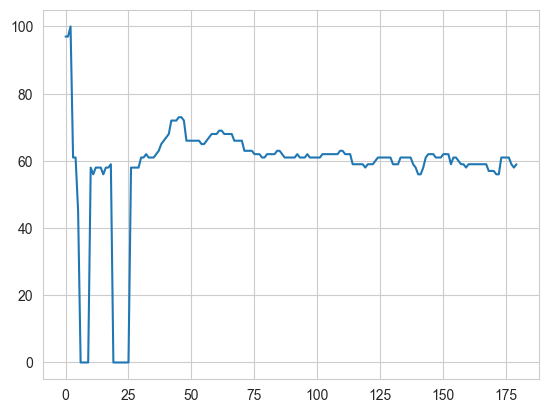

Potential turnoff times
[6, 19]
[97, 97, 100, 61, 61, 45]
-11.628571428571437
105.90476190476193
Decreasing
xxxxx
[0, 0, 0, 0, 58, 56, 58, 58, 58, 56, 58, 58, 59]
5.747252747252748
5.43956043956044
Increasing
xxxxx
[0, 0, 0, 0, 0, 0, 0, 58, 58, 58, 58, 61, 61, 62, 61, 61, 61, 62, 63, 65, 66, 67, 68, 72, 72, 72, 73, 73, 72, 66, 66, 66, 66, 66, 66, 65, 65, 66, 67, 68, 68, 68, 69, 69, 68, 68, 68, 68, 66, 66, 66, 66, 63, 63, 63, 63, 62, 62, 62, 61, 61, 62, 62, 62, 62, 63, 63, 62, 61, 61, 61, 61, 61, 62, 61, 61, 61, 62, 61, 61, 61, 61, 61, 62, 62, 62, 62, 62, 62, 62, 63, 63, 62, 62, 62, 59, 59, 59, 59, 59, 58, 59, 59, 59, 60, 61, 61, 61, 61, 61, 61, 59, 59, 59, 61, 61, 61, 61, 61, 59, 58, 56, 56, 58, 61, 62, 62, 62, 61, 61, 61, 62, 62, 62, 59, 61, 61, 60, 59, 59, 58, 59, 59, 59, 59, 59, 59, 59, 59, 57, 57, 57, 56, 56, 61, 61, 61, 61, 59, 58, 59]
0.05209627329192562
55.167701863354
Increasing
xxxxx
Raw measurements plt


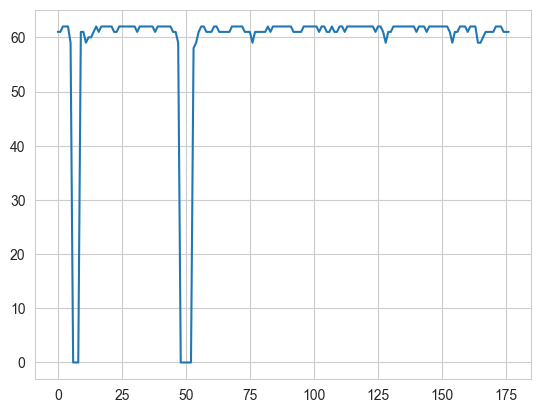

Potential turnoff times
[6, 48]
[61, 61, 62, 62, 62, 59]
-0.20000000000000398
61.666666666666664
Decreasing
xxxxx
[0, 0, 0, 61, 61, 59, 60, 60, 61, 62, 61, 62, 62, 62, 62, 62, 61, 61, 62, 62, 62, 62, 62, 62, 62, 61, 62, 62, 62, 62, 62, 62, 61, 62, 62, 62, 62, 62, 62, 61, 61, 59]
0.5962239688842073
44.872646733111814
Increasing
xxxxx
[0, 0, 0, 0, 0, 58, 59, 61, 62, 62, 61, 61, 61, 62, 62, 61, 61, 61, 61, 61, 62, 62, 62, 62, 62, 61, 61, 61, 59, 61, 61, 61, 61, 61, 62, 61, 62, 62, 62, 62, 62, 62, 62, 62, 61, 61, 61, 61, 62, 62, 62, 62, 62, 62, 61, 62, 62, 61, 61, 62, 61, 61, 62, 62, 61, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 61, 62, 62, 61, 59, 61, 61, 62, 62, 62, 62, 62, 62, 62, 62, 62, 61, 62, 62, 62, 61, 62, 62, 62, 62, 62, 62, 62, 62, 61, 59, 61, 61, 62, 62, 62, 61, 62, 62, 62, 59, 59, 60, 61, 61, 61, 61, 62, 62, 62, 61, 61, 61]
0.10784324686941031
52.16004770423371
Increasing
xxxxx
Raw measurements plt


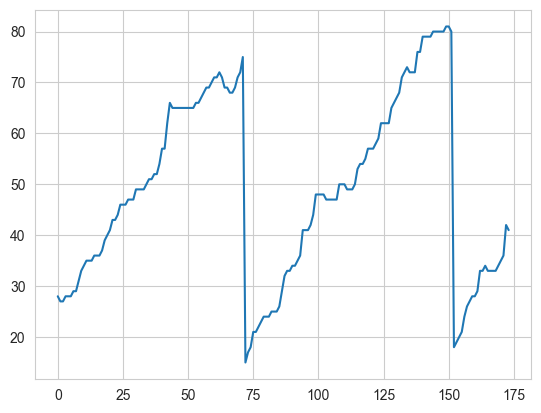

Potential turnoff times
[72, 152]
[28, 27, 27, 28, 28, 28, 29, 29, 31, 33, 34, 35, 35, 35, 36, 36, 36, 37, 39, 40, 41, 43, 43, 44, 46, 46, 46, 47, 47, 47, 49, 49, 49, 49, 50, 51, 51, 52, 52, 54, 57, 57, 62, 66, 65, 65, 65, 65, 65, 65, 65, 65, 65, 66, 66, 67, 68, 69, 69, 70, 71, 71, 72, 71, 69, 69, 68, 68, 69, 71, 72, 75]
0.7111550582031002
26.906773211567728
Increasing
xxxxx
[15, 17, 18, 21, 21, 22, 23, 24, 24, 24, 25, 25, 25, 26, 29, 32, 33, 33, 34, 34, 35, 36, 41, 41, 41, 42, 44, 48, 48, 48, 48, 47, 47, 47, 47, 47, 50, 50, 50, 49, 49, 49, 50, 53, 54, 54, 55, 57, 57, 57, 58, 59, 62, 62, 62, 62, 65, 66, 67, 68, 71, 72, 73, 72, 72, 72, 76, 76, 79, 79, 79, 79, 80, 80, 80, 80, 80, 81, 81, 80]
0.8392522269104545
18.337037037037017
Increasing
xxxxx
[18, 19, 20, 21, 24, 26, 27, 28, 28, 29, 33, 33, 34, 33, 33, 33, 33, 34, 35, 36, 42, 41]
0.9813664596273288
19.695652173913036
Increasing
xxxxx
Raw measurements plt


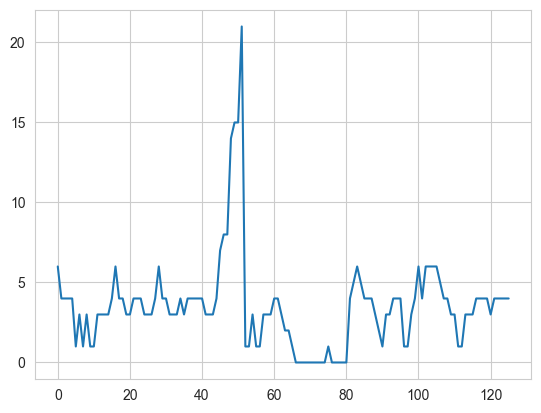

Potential turnoff times
[9, 52, 55, 66, 76, 96, 111]
[6, 4, 4, 4, 4, 1, 3, 1, 3]
-0.4333333333333337
5.066666666666667
Decreasing
xxxxx
[1, 1, 3, 3, 3, 3, 4, 6, 4, 4, 3, 3, 4, 4, 4, 3, 3, 3, 4, 6, 4, 4, 3, 3, 3, 4, 3, 4, 4, 4, 4, 4, 3, 3, 3, 4, 7, 8, 8, 14, 15, 15, 21]
0.19525823014195104
0.8763213530655394
Increasing
xxxxx
[1, 1, 3]
1.0000000000000004
0.6666666666666665
Increasing
xxxxx
[1, 1, 3, 3, 3, 4, 4, 3, 2, 2, 1]
0.018181818181818295
2.3636363636363638
Non-decreasing/Non-increasing
xxxxx
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
0.054545454545454536
-0.14545454545454528
Increasing
xxxxx
[0, 0, 0, 0, 0, 4, 5, 6, 5, 4, 4, 4, 3, 2, 1, 3, 3, 4, 4, 4]
0.15789473684210528
1.2999999999999996
Increasing
xxxxx
[1, 1, 3, 4, 6, 4, 6, 6, 6, 6, 5, 4, 4, 3, 3]
0.11428571428571431
3.333333333333334
Increasing
xxxxx
[1, 1, 3, 3, 3, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4]
0.17499999999999996
2.1083333333333325
Increasing
xxxxx
Raw measurements plt


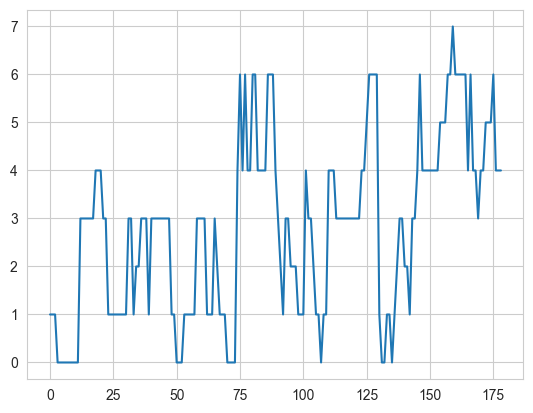

Potential turnoff times
[3, 23, 48, 50, 62, 70, 130, 131]
[1, 1, 1]
3.4665293455950485e-18
0.9999999999999999
Non-decreasing/Non-increasing
xxxxx
[0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3]
0.2526315789473684
-0.5999999999999985
Increasing
xxxxx
[1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 2, 2, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3]
0.10230769230769228
0.8923076923076925
Increasing
xxxxx
[1, 1]
-7.850462293418875e-17
0.9999999999999999
Non-decreasing/Non-increasing
xxxxx
[0, 0, 0, 1, 1, 1, 1, 1, 3, 3, 3, 3]
0.3181818181818181
-0.3333333333333322
Increasing
xxxxx
[1, 1, 1, 3, 2, 1, 1, 1]
-0.011904761904761791
1.4166666666666659
Non-decreasing/Non-increasing
xxxxx
[0, 0, 0, 0, 4, 6, 4, 6, 4, 4, 6, 6, 4, 4, 4, 4, 6, 6, 6, 4, 3, 2, 1, 3, 3, 2, 2, 2, 1, 1, 1, 4, 3, 3, 2, 1, 1, 0, 1, 1, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 5, 6, 6, 6, 6]
0.012447902195054211
2.8661202185792343
Non-decreasing/Non-increasing
xxxxx
[1]
[0, 0, 1, 1, 0, 1, 2, 3, 3, 2, 2, 1, 3, 3, 4, 6, 4, 4, 4, 4, 4, 

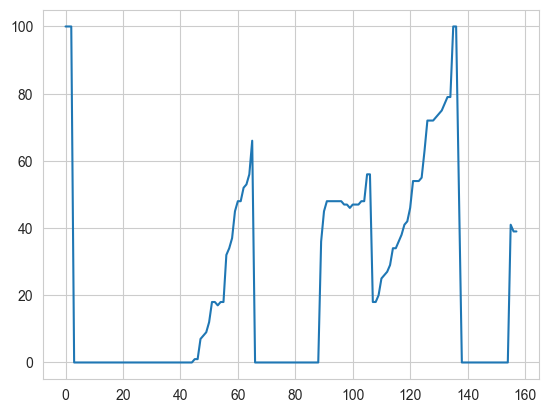

Potential turnoff times
[3, 66, 107, 138]
[100, 100, 100]
7.462276454104577e-15
99.99999999999999
Non-decreasing/Non-increasing
xxxxx
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 7, 8, 9, 12, 18, 18, 17, 18, 18, 32, 34, 37, 45, 48, 48, 52, 53, 56, 66]
0.7203341013824882
-12.838293650793657
Increasing
xxxxx
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 36, 45, 48, 48, 48, 48, 48, 48, 47, 47, 46, 47, 47, 47, 48, 48, 56, 56]
1.7606271777003486
-14.28571428571428
Increasing
xxxxx
[18, 18, 20, 25, 26, 27, 29, 34, 34, 36, 38, 41, 42, 46, 54, 54, 54, 55, 63, 72, 72, 72, 73, 74, 75, 77, 79, 79, 100, 100, 50]
2.4181451612903224
16.53427419354838
Increasing
xxxxx
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 41, 39, 39]
1.5180451127819548
-8.471428571428559
Increasing
xxxxx
Raw measurements plt


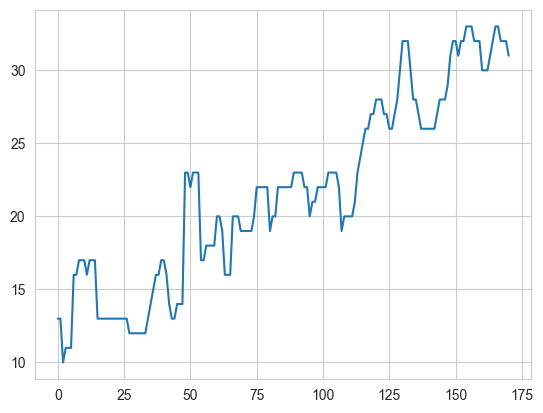

Potential turnoff times
[]
[13, 13, 10, 11, 11, 11, 16, 16, 17, 17, 17, 16, 17, 17, 17, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 13, 14, 15, 16, 16, 17, 17, 16, 14, 13, 13, 14, 14, 14, 23, 23, 22, 23, 23, 23, 17, 17, 18, 18, 18, 18, 20, 20, 19, 16, 16, 16, 20, 20, 20, 19, 19, 19, 19, 19, 20, 22, 22, 22, 22, 22, 19, 20, 20, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 22, 22, 20, 21, 21, 22, 22, 22, 22, 23, 23, 23, 23, 22, 19, 20, 20, 20, 20, 21, 23, 24, 25, 26, 26, 27, 27, 28, 28, 28, 27, 27, 26, 26, 27, 28, 30, 32, 32, 32, 30, 28, 28, 27, 26, 26, 26, 26, 26, 26, 27, 28, 28, 28, 29, 31, 32, 32, 31, 32, 32, 33, 33, 33, 32, 32, 32, 30, 30, 30, 31, 32, 33, 33, 32, 32, 32, 31]
0.12165262677898588
11.296953624371003
Increasing
xxxxx
Raw measurements plt


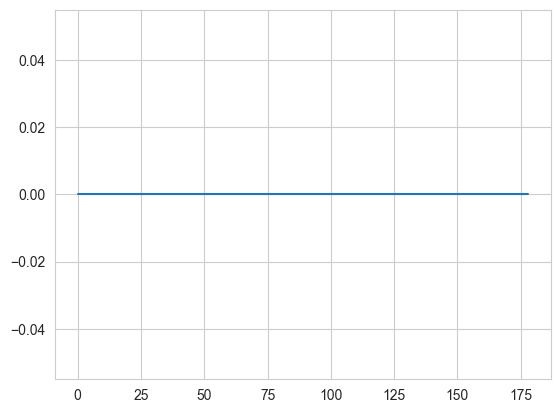

Potential turnoff times
[]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0.0
0.0
Non-decreasing/Non-increasing
xxxxx
Raw measurements plt


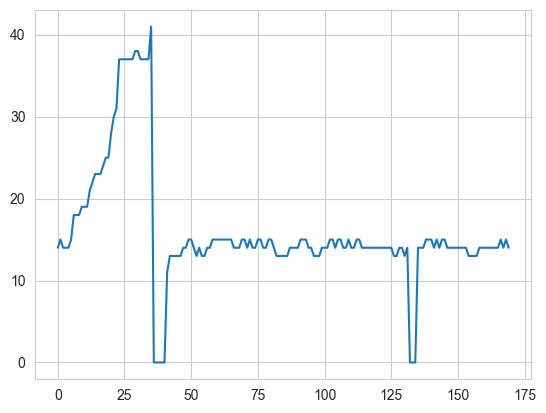

Potential turnoff times
[36, 132]
[14, 15, 14, 14, 14, 15, 18, 18, 18, 19, 19, 19, 21, 22, 23, 23, 23, 24, 25, 25, 28, 30, 31, 37, 37, 37, 37, 37, 37, 38, 38, 37, 37, 37, 37, 41]
0.8513513513513514
11.740240240240238
Increasing
xxxxx
[0, 0, 0, 0, 0, 11, 13, 13, 13, 13, 13, 14, 14, 15, 15, 14, 13, 14, 13, 13, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 15, 15, 14, 15, 14, 14, 15, 15, 14, 14, 15, 15, 14, 13, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 14, 14, 13, 13, 13, 14, 14, 14, 15, 15, 14, 15, 15, 14, 14, 15, 14, 14, 15, 15, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 13, 14, 14, 13, 14]
0.044865708084644636
11.191795532646042
Non-decreasing/Non-increasing
xxxxx
[0, 0, 0, 14, 14, 14, 15, 15, 15, 14, 15, 14, 15, 15, 14, 14, 14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 15, 14, 15, 14]
0.15165773060509866
10.194331983805673
Increasing
xxxxx
Raw measurements plt


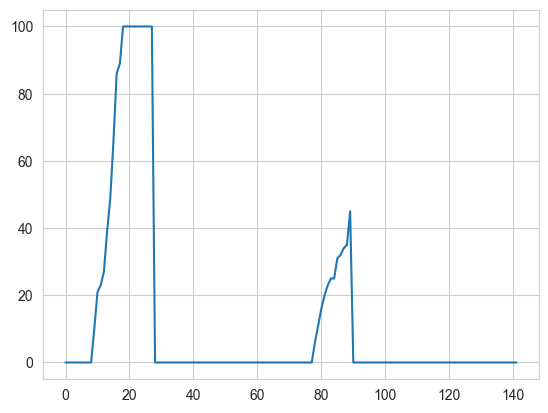

Potential turnoff times
[28, 90]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 21, 23, 27, 39, 49, 66, 86, 89, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
5.15270935960591
-19.204433497536968
Increasing
xxxxx
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 11, 16, 20, 23, 25, 25, 31, 32, 34, 35, 45]
0.4030369419052655
-7.405529953917052
Increasing
xxxxx
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0.0
0.0
Non-decreasing/Non-increasing
xxxxx
Raw measurements plt


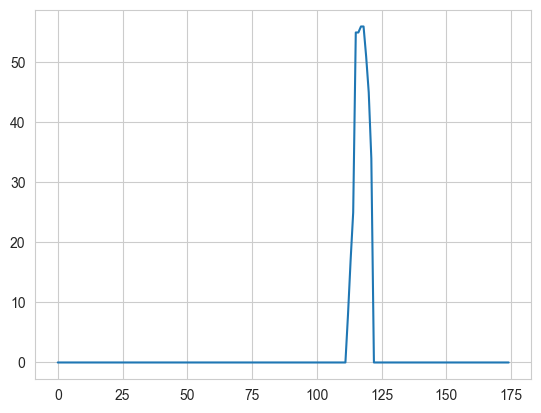

Potential turnoff times
[122]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 17, 25, 55, 55, 56, 56, 51, 45, 34]
0.1506438746815323
-5.818872451019584
Increasing
xxxxx
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0.0
0.0
Non-decreasing/Non-increasing
xxxxx
Raw measurements plt


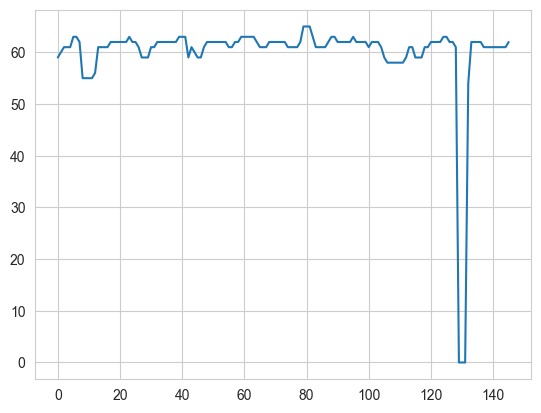

Potential turnoff times
[129]
[59, 60, 61, 61, 61, 63, 63, 62, 55, 55, 55, 55, 56, 61, 61, 61, 61, 62, 62, 62, 62, 62, 62, 63, 62, 62, 61, 59, 59, 59, 61, 61, 62, 62, 62, 62, 62, 62, 62, 63, 63, 63, 59, 61, 60, 59, 59, 61, 62, 62, 62, 62, 62, 62, 62, 61, 61, 62, 62, 63, 63, 63, 63, 63, 62, 61, 61, 61, 62, 62, 62, 62, 62, 62, 61, 61, 61, 61, 62, 65, 65, 65, 63, 61, 61, 61, 61, 62, 63, 63, 62, 62, 62, 62, 62, 63, 62, 62, 62, 62, 61, 62, 62, 62, 61, 59, 58, 58, 58, 58, 58, 58, 59, 61, 61, 59, 59, 59, 61, 61, 62, 62, 62, 62, 63, 63, 62, 62, 61]
0.005987254025045216
60.81061419200951
Non-decreasing/Non-increasing
xxxxx
[0, 0, 0, 54, 62, 62, 62, 62, 61, 61, 61, 61, 61, 61, 61, 61, 62]
3.220588235294117
24.35294117647059
Increasing
xxxxx
Raw measurements plt


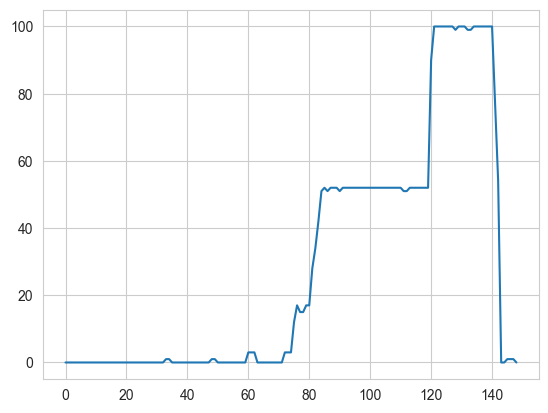

Potential turnoff times
[35, 50, 63, 143]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
0.009243697478991597
-0.10000000000000009
Non-decreasing/Non-increasing
xxxxx
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
0.04642857142857142
-0.19166666666666665
Non-decreasing/Non-increasing
xxxxx
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3]
0.2472527472527472
-0.7912087912087908
Increasing
xxxxx
[0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 12, 17, 15, 15, 17, 17, 28, 34, 42, 51, 52, 51, 52, 52, 52, 51, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 51, 51, 52, 52, 52, 52, 52, 52, 52, 90, 100, 100, 100, 100, 100, 100, 100, 99, 100, 100, 100, 99, 99, 100, 100, 100, 100, 100, 100, 100, 77, 54]
1.313842006563525
1.7407407407407165
Increasing
xxxxx
[0, 0, 1, 1, 1, 0]
0.08571428571428573
0.28571428571428564
Increasing
xxxxx
Raw measurements plt


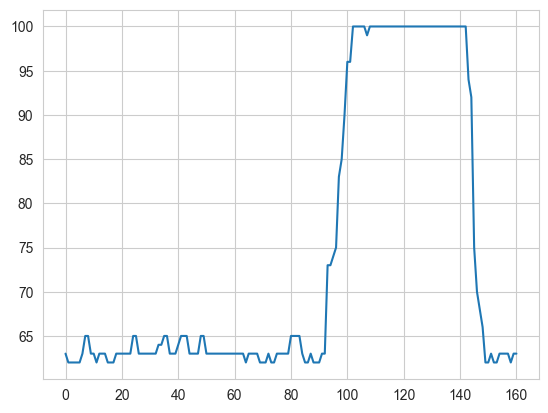

Potential turnoff times
[]
[63, 62, 62, 62, 62, 62, 63, 65, 65, 63, 63, 62, 63, 63, 63, 62, 62, 62, 63, 63, 63, 63, 63, 63, 65, 65, 63, 63, 63, 63, 63, 63, 63, 64, 64, 65, 65, 63, 63, 63, 64, 65, 65, 65, 63, 63, 63, 63, 65, 65, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 62, 63, 63, 63, 63, 62, 62, 62, 63, 62, 62, 63, 63, 63, 63, 63, 65, 65, 65, 65, 63, 62, 62, 63, 62, 62, 62, 63, 63, 73, 73, 74, 75, 83, 85, 90, 96, 96, 100, 100, 100, 100, 100, 99, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 94, 92, 75, 70, 68, 66, 62, 62, 63, 62, 62, 63, 63, 63, 63, 62, 63, 63]
0.20602139406487244
57.630089717046204
Increasing
xxxxx
Raw measurements plt


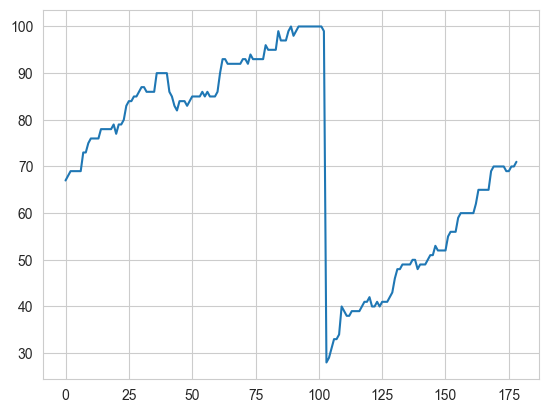

Potential turnoff times
[103]
[67, 68, 69, 69, 69, 69, 69, 73, 73, 75, 76, 76, 76, 76, 78, 78, 78, 78, 78, 79, 77, 79, 79, 80, 83, 84, 84, 85, 85, 86, 87, 87, 86, 86, 86, 86, 90, 90, 90, 90, 90, 86, 85, 83, 82, 84, 84, 84, 83, 84, 85, 85, 85, 85, 86, 85, 86, 85, 85, 85, 86, 90, 93, 93, 92, 92, 92, 92, 92, 92, 93, 93, 92, 94, 93, 93, 93, 93, 93, 96, 95, 95, 95, 95, 99, 97, 97, 97, 99, 100, 98, 99, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 99]
0.28260774063172756
72.80059746079158
Increasing
xxxxx
[28, 29, 31, 33, 33, 34, 40, 39, 38, 38, 39, 39, 39, 39, 40, 41, 41, 42, 40, 40, 41, 40, 41, 41, 41, 42, 43, 46, 48, 48, 49, 49, 49, 49, 50, 50, 48, 49, 49, 49, 50, 51, 51, 53, 52, 52, 52, 52, 55, 56, 56, 56, 59, 60, 60, 60, 60, 60, 60, 62, 65, 65, 65, 65, 65, 69, 70, 70, 70, 70, 70, 69, 69, 70, 70, 71]
0.5295830485304176
31.127477785372513
Increasing
xxxxx
Raw measurements plt


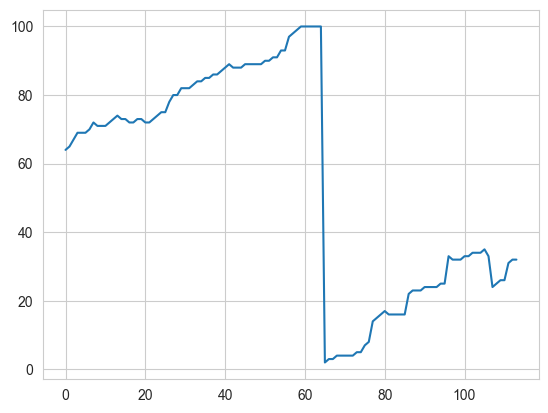

Potential turnoff times
[65]
[64, 65, 67, 69, 69, 69, 70, 72, 71, 71, 71, 72, 73, 74, 73, 73, 72, 72, 73, 73, 72, 72, 73, 74, 75, 75, 78, 80, 80, 82, 82, 82, 83, 84, 84, 85, 85, 86, 86, 87, 88, 89, 88, 88, 88, 89, 89, 89, 89, 89, 90, 90, 91, 91, 93, 93, 97, 98, 99, 100, 100, 100, 100, 100, 100]
0.54208916083916
64.89930069930074
Increasing
xxxxx
[2, 3, 3, 4, 4, 4, 4, 4, 5, 5, 7, 8, 14, 15, 16, 17, 16, 16, 16, 16, 16, 22, 23, 23, 23, 24, 24, 24, 24, 25, 25, 33, 32, 32, 32, 33, 33, 34, 34, 34, 35, 33, 24, 25, 26, 26, 31, 32, 32]
0.703673469387755
3.3771428571428577
Increasing
xxxxx
Raw measurements plt


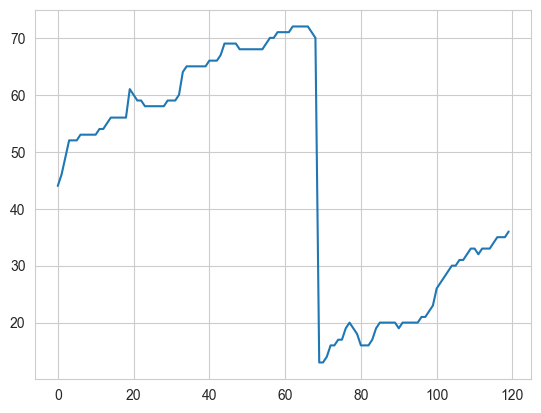

Potential turnoff times
[69]
[44, 46, 49, 52, 52, 52, 53, 53, 53, 53, 53, 54, 54, 55, 56, 56, 56, 56, 56, 61, 60, 59, 59, 58, 58, 58, 58, 58, 58, 59, 59, 59, 60, 64, 65, 65, 65, 65, 65, 65, 66, 66, 66, 67, 69, 69, 69, 69, 68, 68, 68, 68, 68, 68, 68, 69, 70, 70, 71, 71, 71, 71, 72, 72, 72, 72, 72, 71, 70]
0.3557544757033254
50.107246376811574
Increasing
xxxxx
[13, 13, 14, 16, 16, 17, 17, 19, 20, 19, 18, 16, 16, 16, 17, 19, 20, 20, 20, 20, 20, 19, 20, 20, 20, 20, 20, 21, 21, 22, 23, 26, 27, 28, 29, 30, 30, 31, 31, 32, 33, 33, 32, 33, 33, 33, 34, 35, 35, 35, 36]
0.4547511312217192
12.317496229260934
Increasing
xxxxx
Raw measurements plt


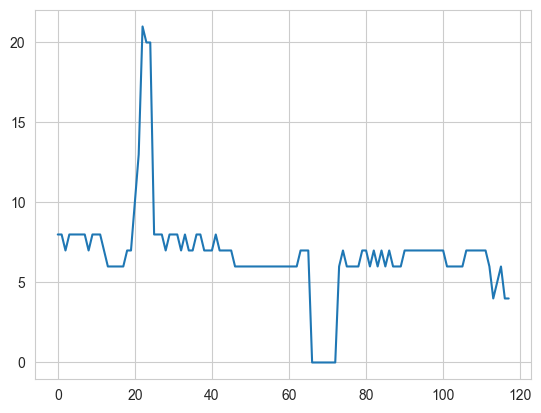

Potential turnoff times
[25, 66]
[8, 8, 7, 8, 8, 8, 8, 8, 7, 8, 8, 8, 7, 6, 6, 6, 6, 6, 7, 7, 10, 13, 21, 20, 20]
0.3369230769230767
5.1169230769230785
Increasing
xxxxx
[8, 8, 8, 7, 8, 8, 8, 7, 8, 7, 7, 8, 8, 7, 7, 7, 8, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7]
-0.050174216027874335
7.832752613240416
Decreasing
xxxxx
[0, 0, 0, 0, 0, 0, 0, 6, 7, 6, 6, 6, 6, 7, 7, 6, 7, 6, 7, 6, 7, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 6, 4, 5, 6, 4, 4]
0.07308119183812854
3.63642960812772
Increasing
xxxxx
Raw measurements plt


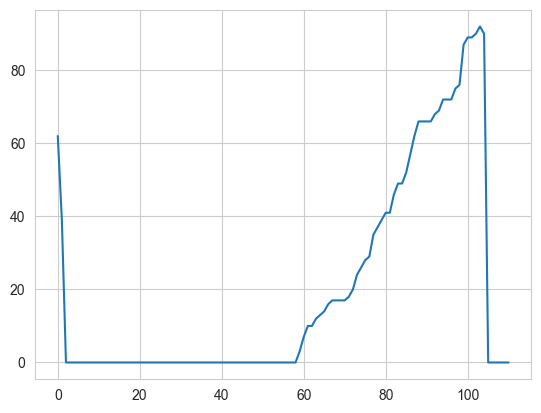

Potential turnoff times
[2, 105]
[62, 39]
-23.00000000000001
61.999999999999986
Decreasing
xxxxx
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 7, 10, 10, 12, 13, 14, 16, 17, 17, 17, 17, 18, 20, 24, 26, 28, 29, 35, 37, 39, 41, 41, 46, 49, 49, 52, 57, 62, 66, 66, 66, 66, 68, 69, 72, 72, 72, 75, 76, 87, 89, 89, 90, 92, 90]
0.8440231955366165
-22.55003734129945
Increasing
xxxxx
[0, 0, 0, 0, 0, 0]
0.0
0.0
Non-decreasing/Non-increasing
xxxxx
Raw measurements plt


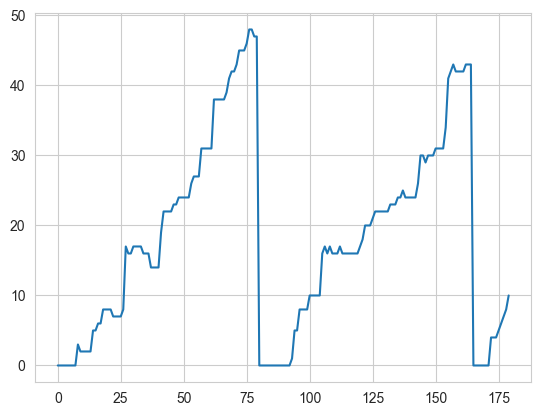

Potential turnoff times
[80, 165]
[0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 2, 2, 2, 2, 5, 5, 6, 6, 8, 8, 8, 8, 7, 7, 7, 7, 8, 17, 16, 16, 17, 17, 17, 17, 16, 16, 16, 14, 14, 14, 14, 19, 22, 22, 22, 22, 23, 23, 24, 24, 24, 24, 24, 26, 27, 27, 27, 31, 31, 31, 31, 31, 38, 38, 38, 38, 38, 39, 41, 42, 42, 43, 45, 45, 45, 46, 48, 48, 47, 47]
0.638853727144866
-4.897222222222231
Increasing
xxxxx
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 5, 8, 8, 8, 8, 10, 10, 10, 10, 10, 16, 17, 16, 17, 16, 16, 16, 17, 16, 16, 16, 16, 16, 16, 16, 17, 18, 20, 20, 20, 21, 22, 22, 22, 22, 22, 22, 23, 23, 23, 24, 24, 25, 24, 24, 24, 24, 24, 26, 30, 30, 29, 30, 30, 30, 31, 31, 31, 31, 34, 41, 42, 43, 42, 42, 42, 42, 43, 43, 43]
0.5060777799491891
-2.0552667578659336
Increasing
xxxxx
[0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 5, 6, 7, 8, 10]
0.7285714285714284
-1.9000000000000006
Increasing
xxxxx
Raw measurements plt


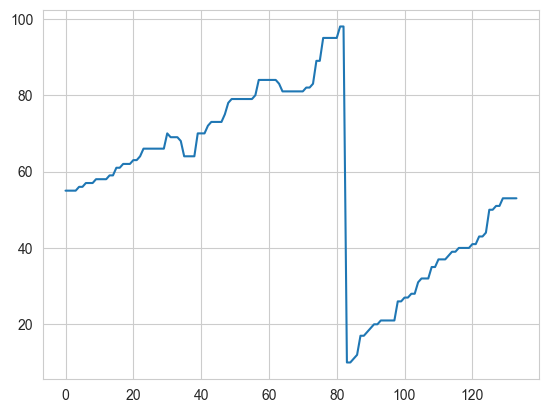

Potential turnoff times
[83]
[55, 55, 55, 55, 56, 56, 57, 57, 57, 58, 58, 58, 58, 59, 59, 61, 61, 62, 62, 62, 63, 63, 64, 66, 66, 66, 66, 66, 66, 66, 70, 69, 69, 69, 68, 64, 64, 64, 64, 70, 70, 70, 72, 73, 73, 73, 73, 75, 78, 79, 79, 79, 79, 79, 79, 79, 80, 84, 84, 84, 84, 84, 84, 83, 81, 81, 81, 81, 81, 81, 81, 82, 82, 83, 89, 89, 95, 95, 95, 95, 95, 98, 98]
0.48060534822215717
52.87349397590363
Increasing
xxxxx
[10, 10, 11, 12, 17, 17, 18, 19, 20, 20, 21, 21, 21, 21, 21, 26, 26, 27, 27, 28, 28, 31, 32, 32, 32, 35, 35, 37, 37, 37, 38, 39, 39, 40, 40, 40, 40, 41, 41, 43, 43, 44, 50, 50, 51, 51, 53, 53, 53, 53, 53]
0.8560180995475111
11.61915535444947
Increasing
xxxxx
Raw measurements plt


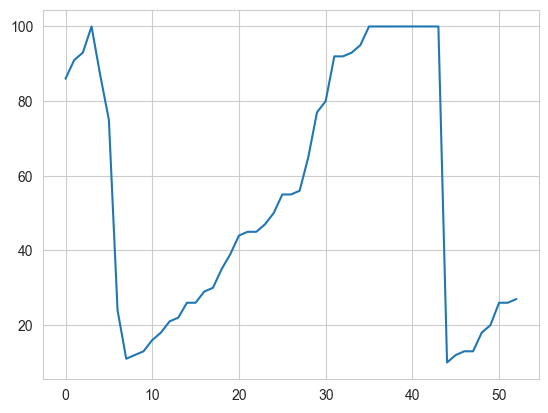

Potential turnoff times
[6, 44]
[86, 91, 93, 100, 87, 75]
-1.714285714285715
92.95238095238093
Decreasing
xxxxx
[24, 11, 12, 13, 16, 18, 21, 22, 26, 26, 29, 30, 35, 39, 44, 45, 45, 47, 50, 55, 55, 56, 65, 77, 80, 92, 92, 93, 95, 100, 100, 100, 100, 100, 100, 100, 100, 100]
2.904365904365903
4.5060728744938965
Increasing
xxxxx
[10, 12, 13, 13, 18, 20, 26, 26, 27]
2.3833333333333333
8.800000000000004
Increasing
xxxxx
Raw measurements plt


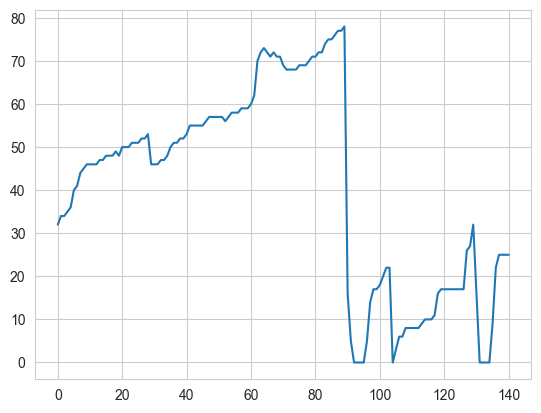

Potential turnoff times
[90, 91, 92, 104, 131]
[32, 34, 34, 35, 36, 40, 41, 44, 45, 46, 46, 46, 46, 47, 47, 48, 48, 48, 49, 48, 50, 50, 50, 51, 51, 51, 52, 52, 53, 46, 46, 46, 47, 47, 48, 50, 51, 51, 52, 52, 53, 55, 55, 55, 55, 55, 56, 57, 57, 57, 57, 57, 56, 57, 58, 58, 58, 59, 59, 59, 60, 62, 70, 72, 73, 72, 71, 72, 71, 71, 69, 68, 68, 68, 68, 69, 69, 69, 70, 71, 71, 72, 72, 74, 75, 75, 76, 77, 77, 78]
0.42760011524056485
37.84957264957263
Increasing
xxxxx
[16]
[5]
[0, 0, 0, 0, 5, 14, 17, 17, 18, 20, 22, 22]
2.4790209790209783
-2.384615384615374
Increasing
xxxxx
[0, 3, 6, 6, 8, 8, 8, 8, 8, 9, 10, 10, 10, 11, 16, 17, 17, 17, 17, 17, 17, 17, 17, 26, 27, 32, 16]
0.8394383394383393
2.3465608465608487
Increasing
xxxxx
[0, 0, 0, 0, 9, 22, 25, 25, 25, 25]
3.715151515151515
-3.6181818181818115
Increasing
xxxxx
Raw measurements plt


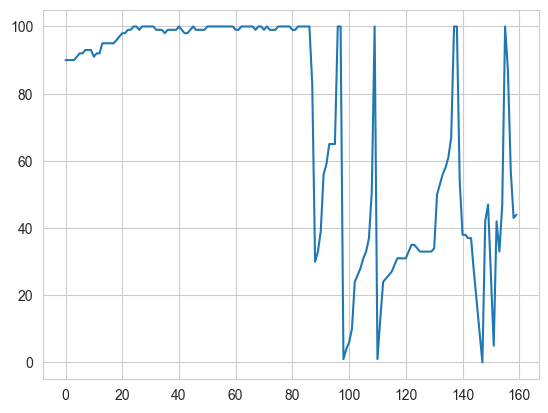

Potential turnoff times
[88, 98, 110]
[90, 90, 90, 90, 91, 92, 92, 93, 93, 93, 91, 92, 92, 95, 95, 95, 95, 95, 96, 97, 98, 98, 99, 99, 100, 100, 99, 100, 100, 100, 100, 100, 99, 99, 99, 98, 99, 99, 99, 99, 100, 99, 98, 98, 99, 100, 99, 99, 99, 99, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 99, 99, 100, 100, 100, 100, 100, 99, 100, 100, 99, 100, 99, 99, 99, 100, 100, 100, 100, 100, 99, 99, 100, 100, 100, 100, 100, 83]
0.07605403120707356
94.47574055158319
Increasing
xxxxx
[30, 33, 39, 56, 59, 65, 65, 65, 100, 100]
7.64848484848485
26.78181818181819
Increasing
xxxxx
[1, 4, 6, 10, 24, 26, 28, 31, 33, 37, 51, 100]
6.527972027972026
-6.653846153846134
Increasing
xxxxx
[1, 13, 24, 25, 26, 27, 29, 31, 31, 31, 31, 33, 35, 35, 34, 33, 33, 33, 33, 33, 34, 50, 53, 56, 58, 61, 67, 100, 100, 54, 38, 38, 37, 37, 27, 18, 9, 0, 42, 47, 26, 5, 42, 33, 47, 100, 87, 57, 43, 44]
0.5202881152460981
26.872941176470583
Increasing
xxxxx
Raw measurements plt


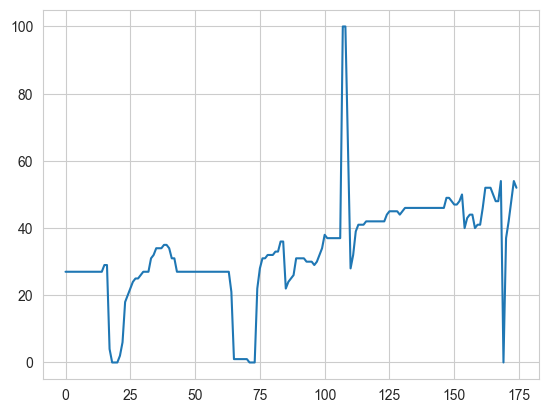

Potential turnoff times
[17, 18, 65, 71]
[27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 29, 29]
0.07352941176470587
26.647058823529402
Increasing
xxxxx
[4]
[0, 0, 0, 2, 6, 18, 20, 22, 24, 25, 25, 26, 27, 27, 27, 31, 32, 34, 34, 34, 35, 35, 34, 31, 31, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 21]
0.3237742830712305
17.404255319148938
Increasing
xxxxx
[1, 1, 1, 1, 1, 1]
-3.9528013340747213e-17
1.0000000000000002
Non-decreasing/Non-increasing
xxxxx
[0, 0, 0, 22, 28, 31, 31, 32, 32, 32, 33, 33, 36, 36, 22, 24, 25, 26, 31, 31, 31, 31, 30, 30, 30, 29, 30, 32, 34, 38, 37, 37, 37, 37, 37, 37, 100, 100, 64, 28, 32, 39, 41, 41, 41, 42, 42, 42, 42, 42, 42, 42, 42, 44, 45, 45, 45, 45, 44, 45, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 49, 49, 48, 47, 47, 48, 50, 40, 43, 44, 44, 40, 41, 41, 46, 52, 52, 52, 50, 48, 48, 54, 0, 37, 42, 48, 54, 52]
0.22258081724101136
28.719780219780237
Increasing
xxxxx
Raw measurements plt


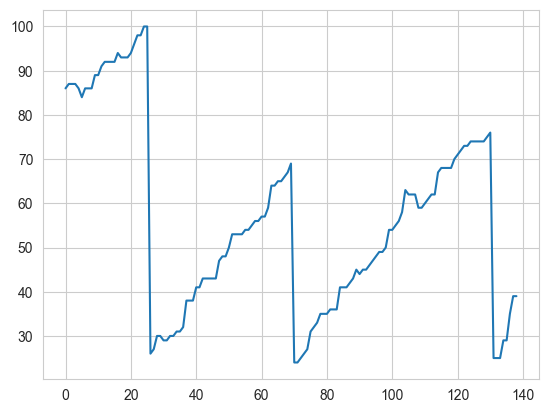

Potential turnoff times
[26, 70, 131]
[86, 87, 87, 87, 86, 84, 86, 86, 86, 89, 89, 91, 92, 92, 92, 92, 94, 93, 93, 93, 94, 96, 98, 98, 100, 100]
0.5788034188034171
83.95726495726498
Increasing
xxxxx
[26, 27, 30, 30, 29, 29, 30, 30, 31, 31, 32, 38, 38, 38, 41, 41, 43, 43, 43, 43, 43, 47, 48, 48, 50, 53, 53, 53, 53, 54, 54, 55, 56, 56, 57, 57, 59, 64, 64, 65, 65, 66, 67, 69]
0.989922480620155
25.28484848484849
Increasing
xxxxx
[24, 24, 25, 26, 27, 31, 32, 33, 35, 35, 35, 36, 36, 36, 41, 41, 41, 42, 43, 45, 44, 45, 45, 46, 47, 48, 49, 49, 50, 54, 54, 55, 56, 58, 63, 62, 62, 62, 59, 59, 60, 61, 62, 62, 67, 68, 68, 68, 68, 70, 71, 72, 73, 73, 74, 74, 74, 74, 74, 75, 76]
0.8811210999471178
26.33685880486514
Increasing
xxxxx
[25, 25, 25, 29, 29, 35, 39, 39]
2.357142857142858
22.499999999999986
Increasing
xxxxx
Raw measurements plt


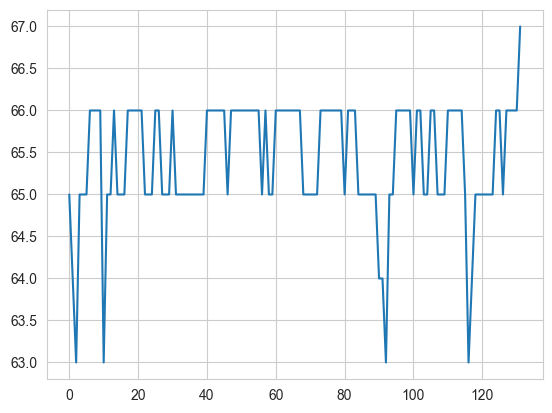

Potential turnoff times
[]
[65, 64, 63, 65, 65, 65, 66, 66, 66, 66, 63, 65, 65, 66, 65, 65, 65, 66, 66, 66, 66, 66, 65, 65, 65, 66, 66, 65, 65, 65, 66, 65, 65, 65, 65, 65, 65, 65, 65, 65, 66, 66, 66, 66, 66, 66, 65, 66, 66, 66, 66, 66, 66, 66, 66, 66, 65, 66, 65, 65, 66, 66, 66, 66, 66, 66, 66, 66, 65, 65, 65, 65, 65, 66, 66, 66, 66, 66, 66, 66, 65, 66, 66, 66, 65, 65, 65, 65, 65, 65, 64, 64, 63, 65, 65, 66, 66, 66, 66, 66, 65, 66, 66, 65, 65, 66, 66, 65, 65, 65, 66, 66, 66, 66, 66, 65, 63, 64, 65, 65, 65, 65, 65, 65, 66, 66, 65, 66, 66, 66, 66, 67]
0.0015001069641484672
65.33356117566645
Non-decreasing/Non-increasing
xxxxx
Raw measurements plt


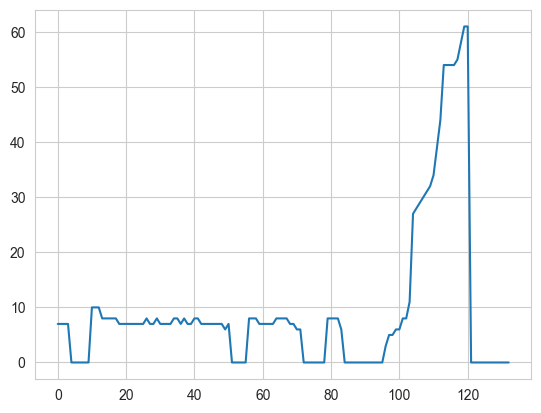

Potential turnoff times
[4, 51, 72, 84, 121]
[7, 7, 7, 7]
-8.759793233066275e-16
7.000000000000001
Non-decreasing/Non-increasing
xxxxx
[0, 0, 0, 0, 0, 0, 10, 10, 10, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 8, 7, 7, 7, 7, 8, 8, 7, 8, 7, 7, 8, 8, 7, 7, 7, 7, 7, 7, 7, 6, 7]
0.0795559666975024
4.702127659574468
Increasing
xxxxx
[0, 0, 0, 0, 0, 8, 8, 8, 7, 7, 7, 7, 7, 8, 8, 8, 8, 7, 7, 6, 6]
0.3467532467532467
2.103896103896105
Increasing
xxxxx
[0, 0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 6]
0.9020979020979017
-1.794871794871791
Increasing
xxxxx
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 5, 5, 6, 6, 8, 8, 11, 27, 28, 29, 30, 31, 32, 34, 39, 44, 54, 54, 54, 54, 55, 58, 61, 61]
1.9855381697486956
-14.199146514936007
Increasing
xxxxx
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0.0
0.0
Non-decreasing/Non-increasing
xxxxx
Raw measurements plt


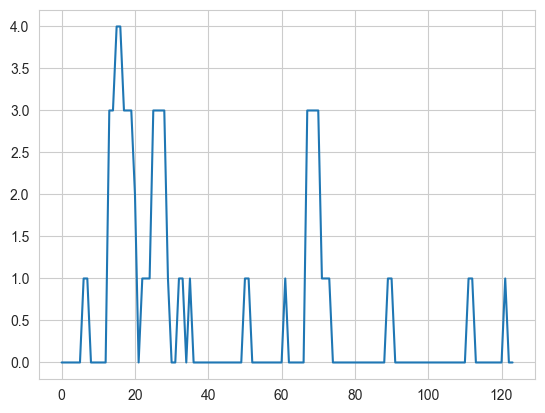

Potential turnoff times
[8, 29, 30, 36, 52, 62, 71, 74, 91, 113, 122]
[0, 0, 0, 0, 0, 0, 1, 1]
0.14285714285714282
-0.24999999999999997
Increasing
xxxxx
[0, 0, 0, 0, 0, 3, 3, 4, 4, 3, 3, 3, 2, 0, 1, 1, 1, 3, 3, 3, 3]
0.09610389610389612
0.9437229437229442
Increasing
xxxxx
[1]
[0, 0, 1, 1, 0, 1]
0.14285714285714285
0.14285714285714296
Increasing
xxxxx
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
0.04117647058823529
-0.18382352941176475
Non-decreasing/Non-increasing
xxxxx
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
0.054545454545454536
-0.14545454545454528
Increasing
xxxxx
[0, 0, 0, 0, 0, 3, 3, 3, 3]
0.5000000000000002
-0.6666666666666677
Increasing
xxxxx
[1, 1, 1]
3.4665293455950485e-18
0.9999999999999999
Non-decreasing/Non-increasing
xxxxx
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
0.03676470588235295
-0.17647058823529435
Non-decreasing/Non-increasing
xxxxx
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
0.02258610954263127
-0.14624505928853757
Non-decreasing/Non-inc

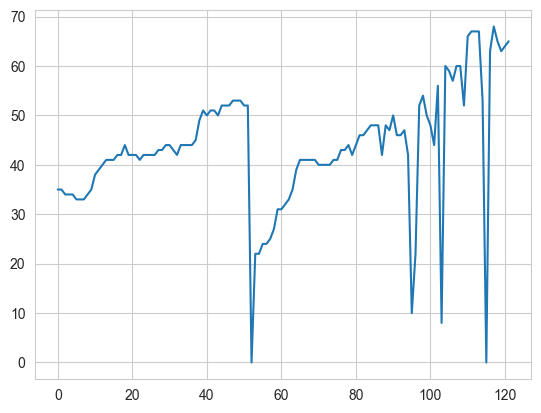

Potential turnoff times
[52]
[35, 35, 34, 34, 34, 33, 33, 33, 34, 35, 38, 39, 40, 41, 41, 41, 42, 42, 44, 42, 42, 42, 41, 42, 42, 42, 42, 43, 43, 44, 44, 43, 42, 44, 44, 44, 44, 45, 49, 51, 50, 51, 51, 50, 52, 52, 52, 53, 53, 53, 52, 52]
0.38760351745923377
33.269956458635676
Increasing
xxxxx
[0, 22, 22, 24, 24, 25, 27, 31, 31, 32, 33, 35, 39, 41, 41, 41, 41, 41, 40, 40, 40, 40, 41, 41, 43, 43, 44, 42, 44, 46, 46, 47, 48, 48, 48, 42, 48, 47, 50, 46, 46, 47, 42, 10, 22, 52, 54, 50, 48, 44, 56, 8, 60, 59, 57, 60, 60, 52, 66, 67, 67, 67, 53, 0, 63, 68, 65, 63, 64, 65]
0.48382468725395894
27.008048289738408
Increasing
xxxxx
Raw measurements plt


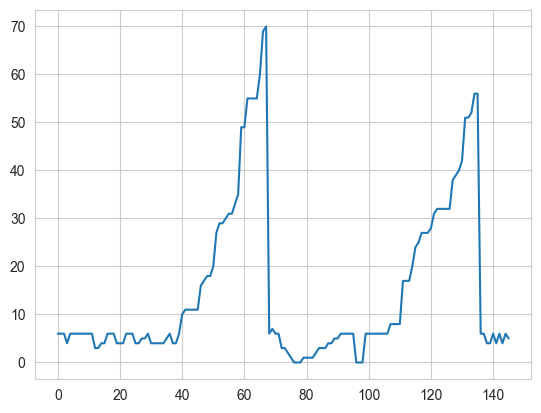

Potential turnoff times
[68, 76, 96, 136]
[6, 6, 6, 4, 6, 6, 6, 6, 6, 6, 6, 6, 3, 3, 4, 4, 6, 6, 6, 4, 4, 4, 6, 6, 6, 4, 4, 5, 5, 6, 4, 4, 4, 4, 4, 5, 6, 4, 4, 6, 10, 11, 11, 11, 11, 11, 16, 17, 18, 18, 20, 27, 29, 29, 30, 31, 31, 33, 35, 49, 49, 55, 55, 55, 55, 60, 69, 70]
0.7445318166202236
-8.515345268542209
Increasing
xxxxx
[6, 7, 6, 6, 3, 3, 2, 1]
-0.8571428571428565
7.249999999999997
Decreasing
xxxxx
[0, 0, 0, 1, 1, 1, 1, 2, 3, 3, 3, 4, 4, 5, 5, 6, 6, 6, 6, 6]
0.37819548872180453
-0.4428571428571411
Increasing
xxxxx
[0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 17, 17, 17, 20, 24, 25, 27, 27, 27, 28, 31, 32, 32, 32, 32, 32, 38, 39, 40, 42, 51, 51, 52, 56, 56]
1.4158536585365857
-4.484146341463421
Increasing
xxxxx
[6, 6, 4, 4, 6, 4, 6, 4, 6, 5]
-0.030303030303030044
5.236363636363635
Non-decreasing/Non-increasing
xxxxx
Raw measurements plt


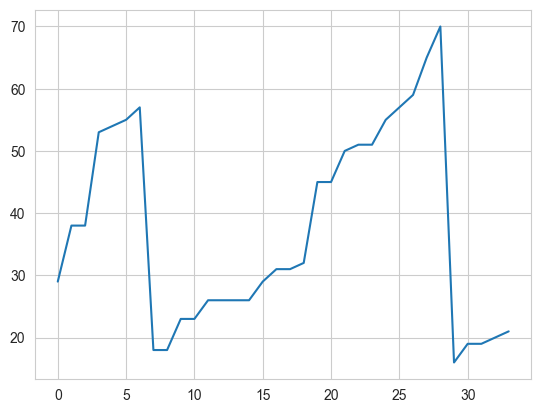

Potential turnoff times
[7, 29]
[29, 38, 38, 53, 54, 55, 57]
4.785714285714285
31.928571428571445
Increasing
xxxxx
[18, 18, 23, 23, 26, 26, 26, 26, 29, 31, 31, 32, 45, 45, 50, 51, 51, 55, 57, 59, 65, 70]
2.413890457368718
13.608695652173905
Increasing
xxxxx
[16, 19, 19, 20, 21]
1.100000000000001
16.799999999999994
Increasing
xxxxx


In [13]:
for i in data['container_id'].unique():
    viz_data(i,data)

In [38]:

TURN_PARAMETER = 2
EPS = 0.01

def trend_label(a):
    if -0.05 <= a <= 0.05:
        return 'Non-decreasing/Non-increasing'
    elif a > 0.05:
        return 'Increasing'
    elif a < -0.05:
        return 'Decreasing'
    else:
        return 'Unknown'

def trend_data(data):
    results = []

    for cont_id in data['container_id'].unique():
        subset = data[data['container_id'] == cont_id].sort_values(by='measured_at').drop_duplicates(subset=['percent_calculated', 'measured_at'])
        subset = subset.reset_index(drop=True)

        measurements_list = subset['percent_calculated'].tolist()
        potential_turnoff_indices = []
        for i in range(len(measurements_list)-TURN_PARAMETER):
            if i == 0:
                continue
            NEXT_VAL = measurements_list[i+1] + EPS
            NEXT_NEXT_VAL = measurements_list[i+2] + EPS

            if (measurements_list[i] / NEXT_VAL) > TURN_PARAMETER and (measurements_list[i] / NEXT_NEXT_VAL) > TURN_PARAMETER:
                potential_turnoff_indices.append(i+1)  # twice in a row there was less than half of the previous measurement

        array_of_monotonical_arrays = []
        if len(potential_turnoff_indices) == 0:
            array_of_monotonical_arrays.append(measurements_list)
        else:
            array_of_monotonical_arrays.append(measurements_list[:potential_turnoff_indices[0]])

            for i in range(len(potential_turnoff_indices)):
                if i == (len(potential_turnoff_indices)-1):
                    arr = measurements_list[potential_turnoff_indices[-1]:]
                else:
                    arr = measurements_list[potential_turnoff_indices[i]:potential_turnoff_indices[i+1]]

                array_of_monotonical_arrays.append(arr)

        for arr in array_of_monotonical_arrays:
            try:
                a, b = np.polyfit([i for i in range(len(arr))], arr, 1)
                trend = trend_label(a)
                results.append({'container_id': cont_id, 'potential_turnoff_indices': potential_turnoff_indices, 'a': a, 'b': b, 'trend': trend})
            except:
                pass

    if results:
        result_df = pd.DataFrame(results)
        return result_df
    else:
        return pd.DataFrame()




In [39]:
result_df = trend_data(data)


/Users/adelh/PycharmProjects/Analyst_task/venv/lib/python3.9/site-packages/numpy/lib/polynomial.py:668: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


In [40]:
result_df

,container_id,potential_turnoff_indices,a,b,trend
0,30149,[],-0.013024,50.504497,Non-decreasing/Non-increasing
1,30037,[],0.002794,61.783898,Non-decreasing/Non-increasing
2,30105,"[3, 4, 32, 42, 62, 120]",-0.500000,3.833333,Decreasing
3,30105,"[3, 4, 32, 42, 62, 120]",1.422277,3.334975,Increasing
4,30105,"[3, 4, 32, 42, 62, 120]",0.127273,-0.272727,Increasing
...,...,...,...,...,...
173,29907,"[68, 76, 96, 136]",1.415854,-4.484146,Increasing
174,29907,"[68, 76, 96, 136]",-0.030303,5.236364,Non-decreasing/Non-increasing
175,30143,"[7, 29]",4.785714,31.928571,Increasing
176,30143,"[7, 29]",2.413890,13.608696,Increasing
